In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import xgboost
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Charan Deep Singh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

# Train-Data

In [3]:
df1 = pd.read_csv('TrainDataset.csv')

# Test-Data

In [4]:
df2 = pd.read_csv('TestDataset.csv')

In [5]:
df1.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,4,5,4,2,2,1
1,2,3,5,4,2,2,2
2,3,3,3,4,3,2,2
3,3,2,4,4,2,3,2
4,1,4,3,5,1,3,2


In [6]:
df2.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating
0,4,3,4,5,2,3
1,2,1,3,4,1,1
2,2,2,3,2,3,1
3,3,4,2,5,2,2
4,1,3,4,2,3,2


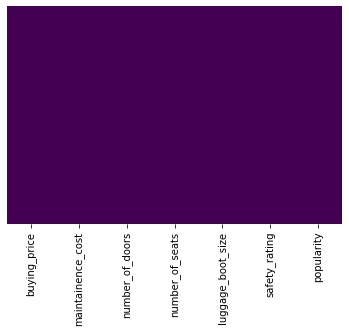

In [7]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

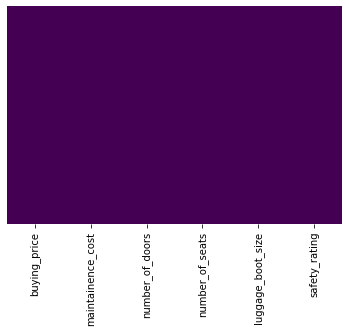

In [8]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
buying_price         1302 non-null int64
maintainence_cost    1302 non-null int64
number_of_doors      1302 non-null int64
number_of_seats      1302 non-null int64
luggage_boot_size    1302 non-null int64
safety_rating        1302 non-null int64
popularity           1302 non-null int64
dtypes: int64(7)
memory usage: 71.3 KB


In [10]:
df1.isnull().sum()

buying_price         0
maintainence_cost    0
number_of_doors      0
number_of_seats      0
luggage_boot_size    0
safety_rating        0
popularity           0
dtype: int64

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 6 columns):
buying_price         326 non-null int64
maintainence_cost    326 non-null int64
number_of_doors      326 non-null int64
number_of_seats      326 non-null int64
luggage_boot_size    326 non-null int64
safety_rating        326 non-null int64
dtypes: int64(6)
memory usage: 15.4 KB


In [12]:
df2.isnull().sum()

buying_price         0
maintainence_cost    0
number_of_doors      0
number_of_seats      0
luggage_boot_size    0
safety_rating        0
dtype: int64

In [13]:
df1.describe()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2.533026,2.505376,3.493856,3.649002,1.990783,1.990015,1.352535
std,1.109695,1.119824,1.125298,1.259733,0.821450,0.820973,0.653252
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000
75%,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,4.000000


In [14]:
df1.corr()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
buying_price,1.000000,-0.006019,0.014320,0.022870,0.016355,0.043813,-0.214884
maintainence_cost,-0.006019,1.000000,0.015885,0.003791,0.026793,0.000476,-0.196453
number_of_doors,0.014320,0.015885,1.000000,-0.025651,0.011580,-0.010467,0.047388
number_of_seats,0.022870,0.003791,-0.025651,1.000000,-0.013528,-0.035350,0.361573
luggage_boot_size,0.016355,0.026793,0.011580,-0.013528,1.000000,-0.011534,0.123515
safety_rating,0.043813,0.000476,-0.010467,-0.035350,-0.011534,1.000000,0.420769
popularity,-0.214884,-0.196453,0.047388,0.361573,0.123515,0.420769,1.000000


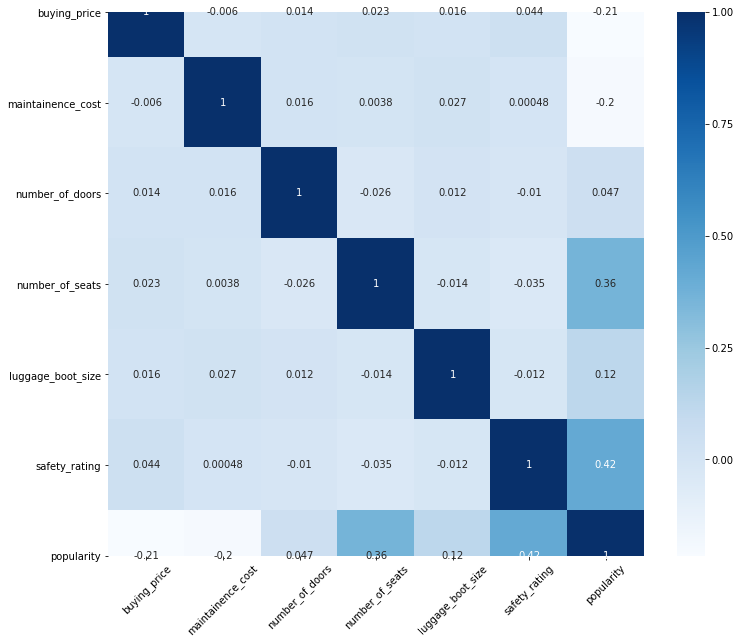

In [15]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.xticks(rotation = 45)
plt.show()

In [16]:
df1.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,4,5,4,2,2,1
1,2,3,5,4,2,2,2
2,3,3,3,4,3,2,2
3,3,2,4,4,2,3,2
4,1,4,3,5,1,3,2


In [17]:
df1.describe()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2.533026,2.505376,3.493856,3.649002,1.990783,1.990015,1.352535
std,1.109695,1.119824,1.125298,1.259733,0.821450,0.820973,0.653252
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000
75%,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,4.000000


In [18]:
q = df1.popularity.describe()
print(q)
IQR    = q['75%'] - q['25%']
Upper  = q['75%'] + 1.5 * IQR
Lower  = q['25%'] - 1.5 * IQR
print("the upper and lower outliers are {} and {}".format(Upper,Lower))

count    1302.000000
mean        1.352535
std         0.653252
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: popularity, dtype: float64
the upper and lower outliers are 3.5 and -0.5


# EDA

In [19]:
def plot_feature(df,col):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        mean = df.groupby(col)['popularity'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels,inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1,2,2)
    
    if df[col].dtype == 'int64' or col == 'buying_price':
        mean = df.groupby(col)['popularity'].mean()
        std = df.groupby(col)['popularity'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)),mean.values-std.values,mean.values + std.values, \
                        alpha=0.1)
    else:
        sns.boxplot(x = col,y='popularity',data=df)
    plt.xticks(rotation=45)
    plt.ylabel('popularity')
    plt.show()    

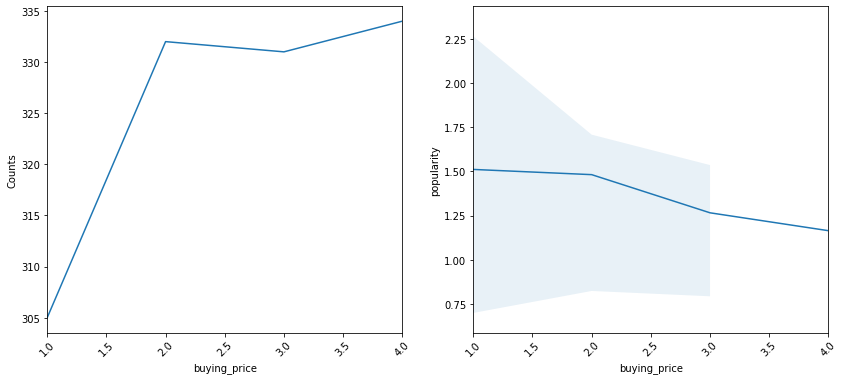

In [20]:
plot_feature(df1,'buying_price')

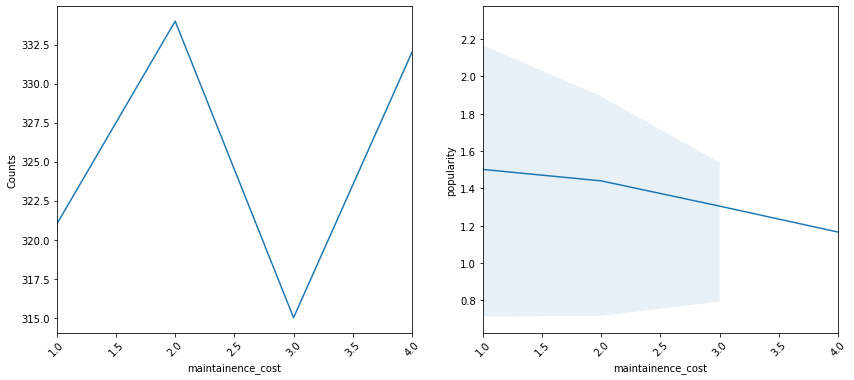

In [21]:
plot_feature(df1,'maintainence_cost')

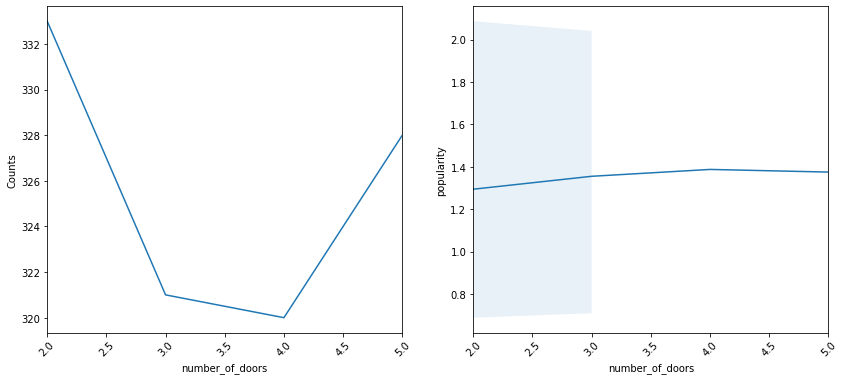

In [22]:
plot_feature(df1,'number_of_doors')

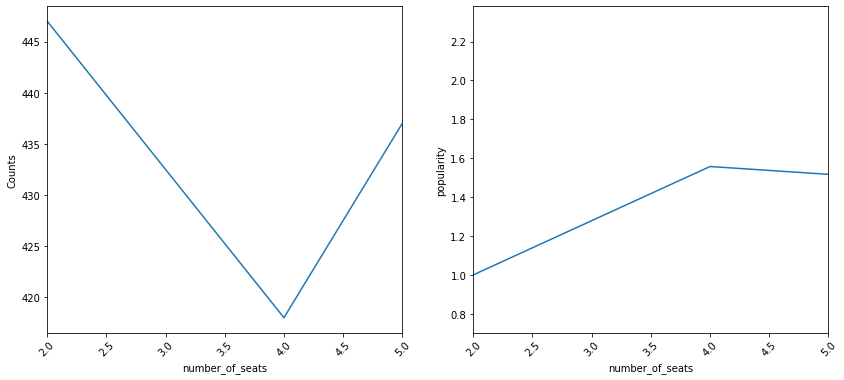

In [23]:
plot_feature(df1,'number_of_seats')

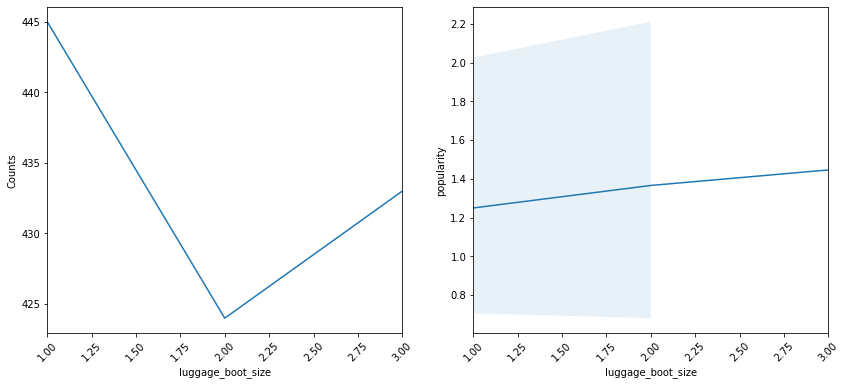

In [24]:
plot_feature(df1,'luggage_boot_size')

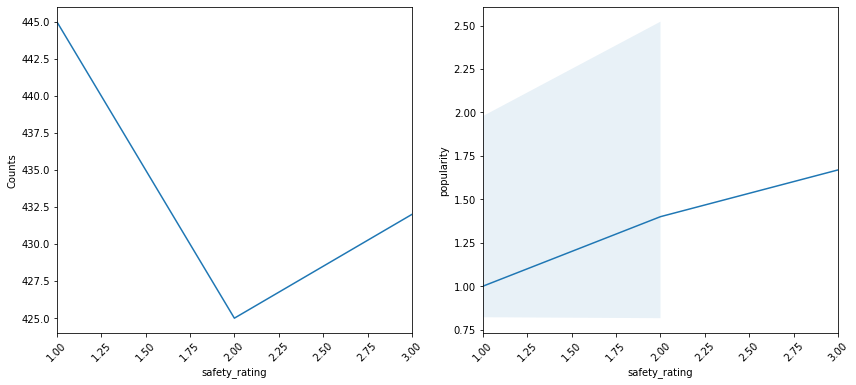

In [25]:
plot_feature(df1,'safety_rating')

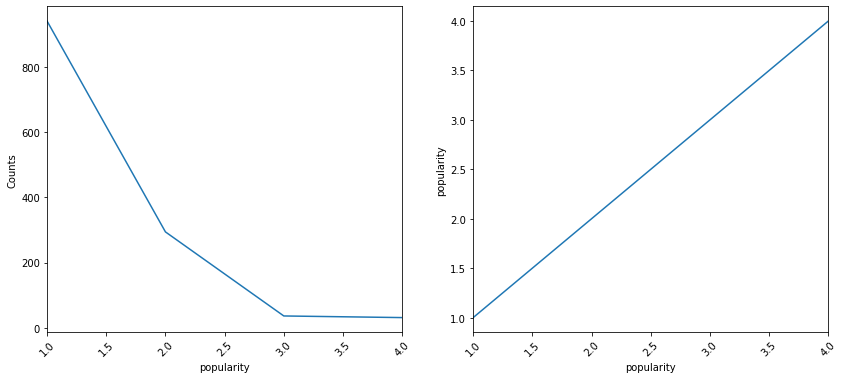

In [26]:
plot_feature(df1,'popularity')

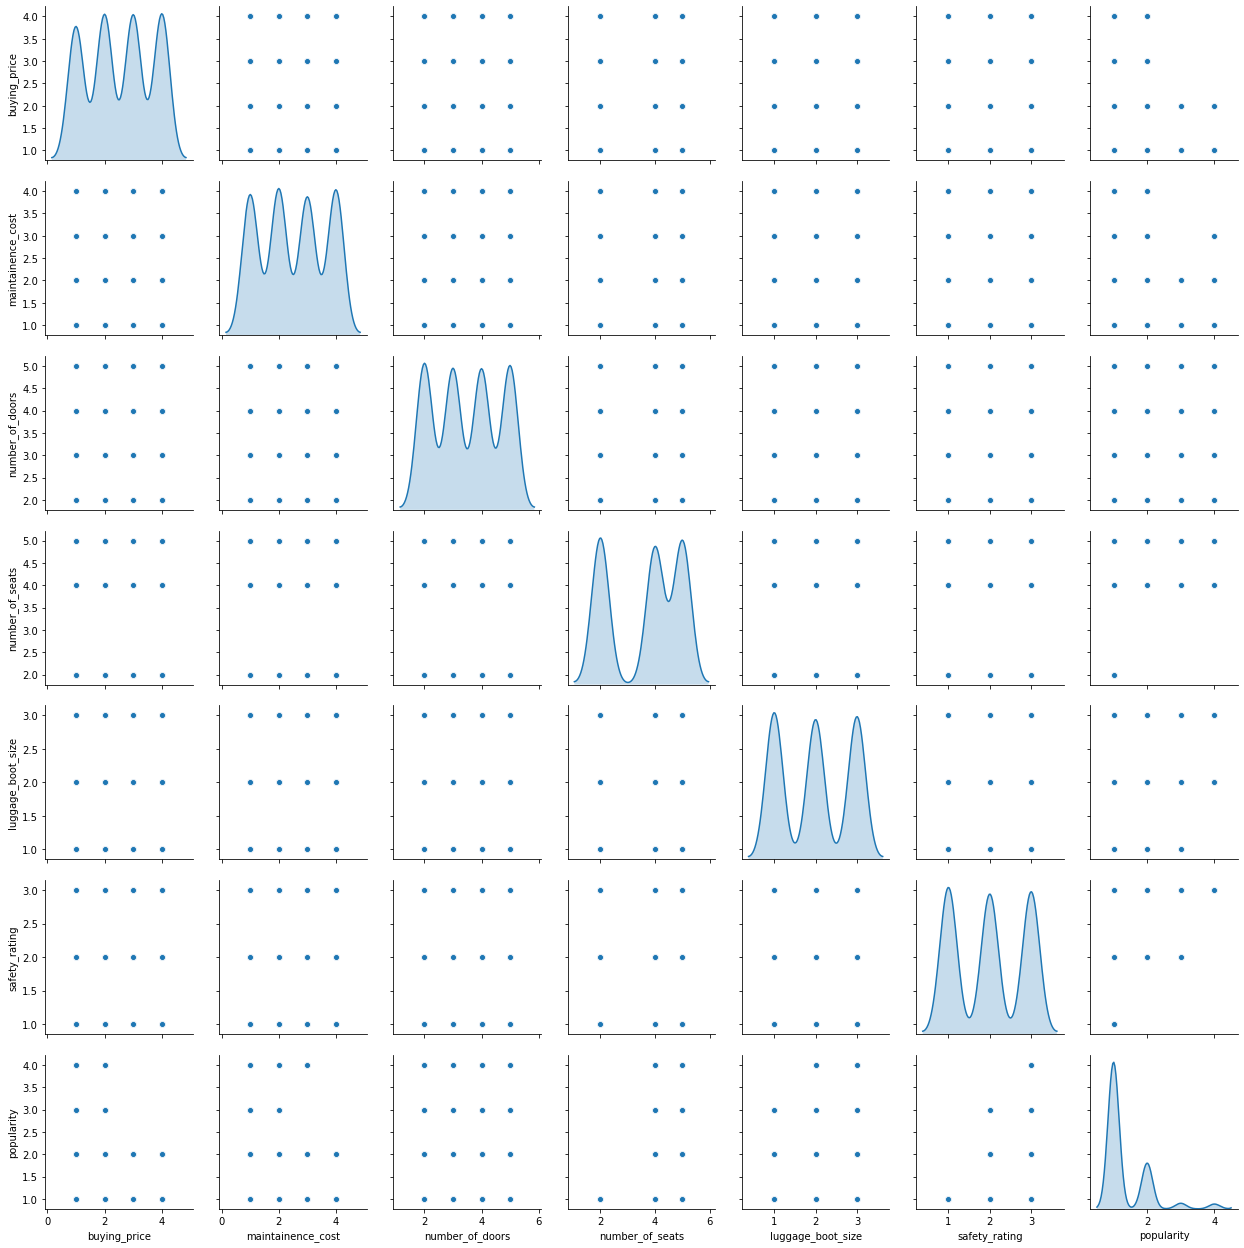

In [27]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

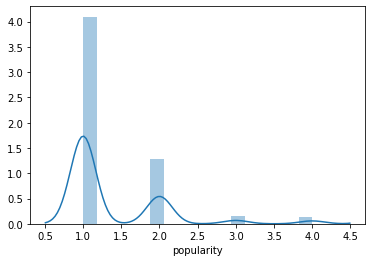

In [28]:
sns.distplot(df1['popularity']);

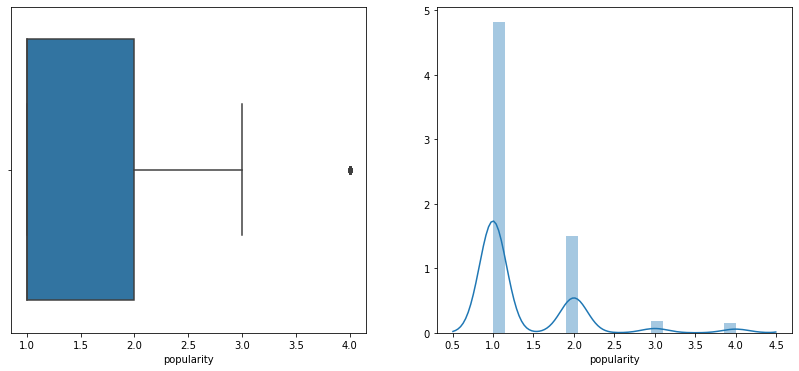

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(df1.popularity)
plt.subplot(1,2,2)
sns.distplot(df1.popularity,bins=20)
plt.show()

<Figure size 720x576 with 0 Axes>

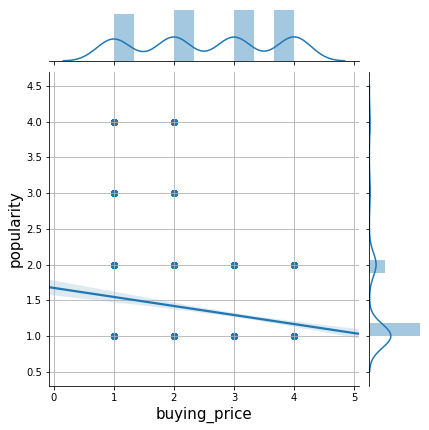

<Figure size 720x576 with 0 Axes>

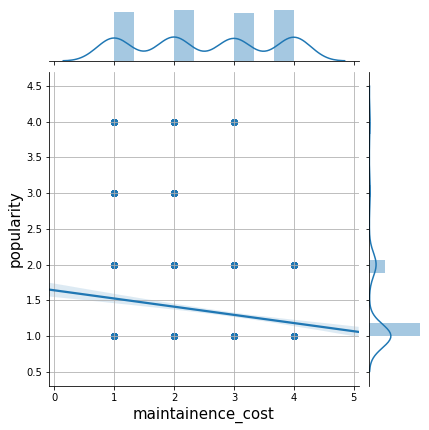

<Figure size 720x576 with 0 Axes>

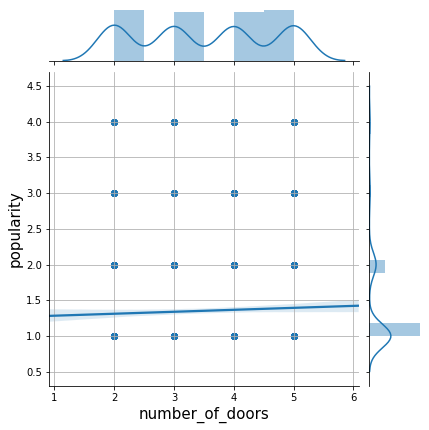

<Figure size 720x576 with 0 Axes>

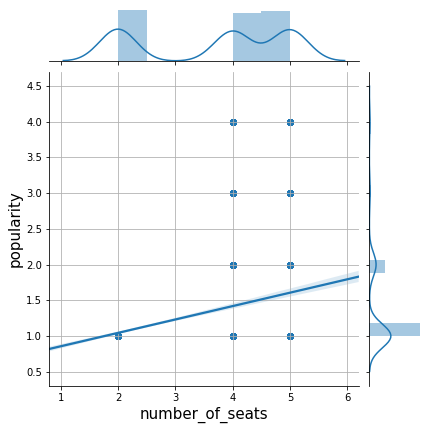

<Figure size 720x576 with 0 Axes>

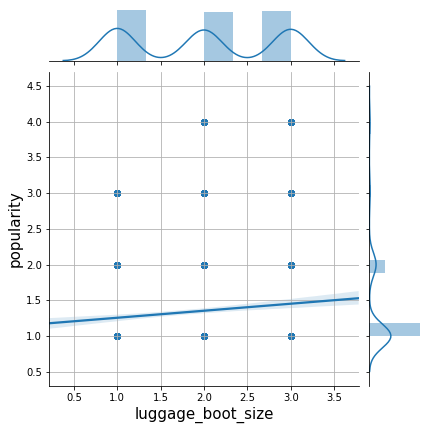

<Figure size 720x576 with 0 Axes>

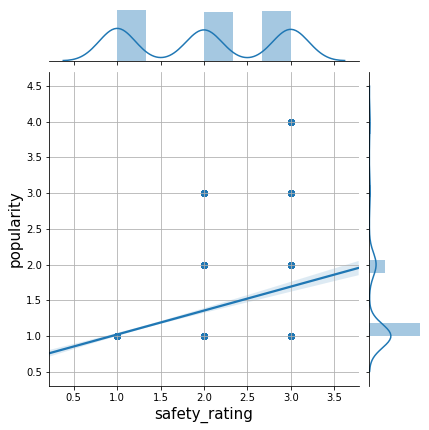

<Figure size 720x576 with 0 Axes>

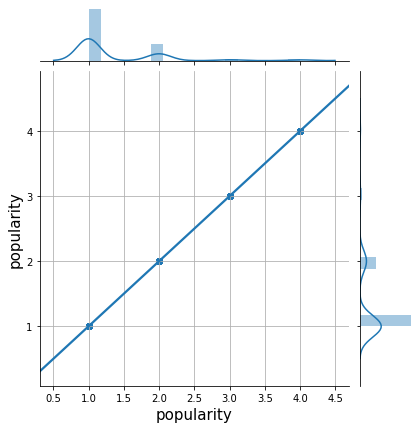

In [30]:
for col in df1[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df1[col],y = df1["popularity"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("popularity",fontsize = 15)
    plt.grid()
    plt.show()

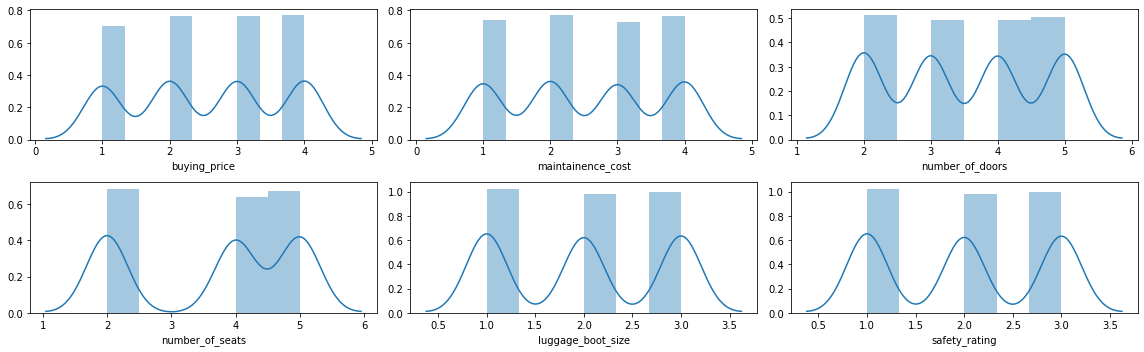

In [31]:
rows =2

cols = 3

fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,5))

col = df1.columns

index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df1[col[index]],ax=ax[i][j])
        index = index + 1
        
plt.tight_layout()

In [32]:
col = ['buying_price', 'maintainence_cost', 'number_of_doors','number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity']

In [33]:
col

['buying_price',
 'maintainence_cost',
 'number_of_doors',
 'number_of_seats',
 'luggage_boot_size',
 'safety_rating',
 'popularity']

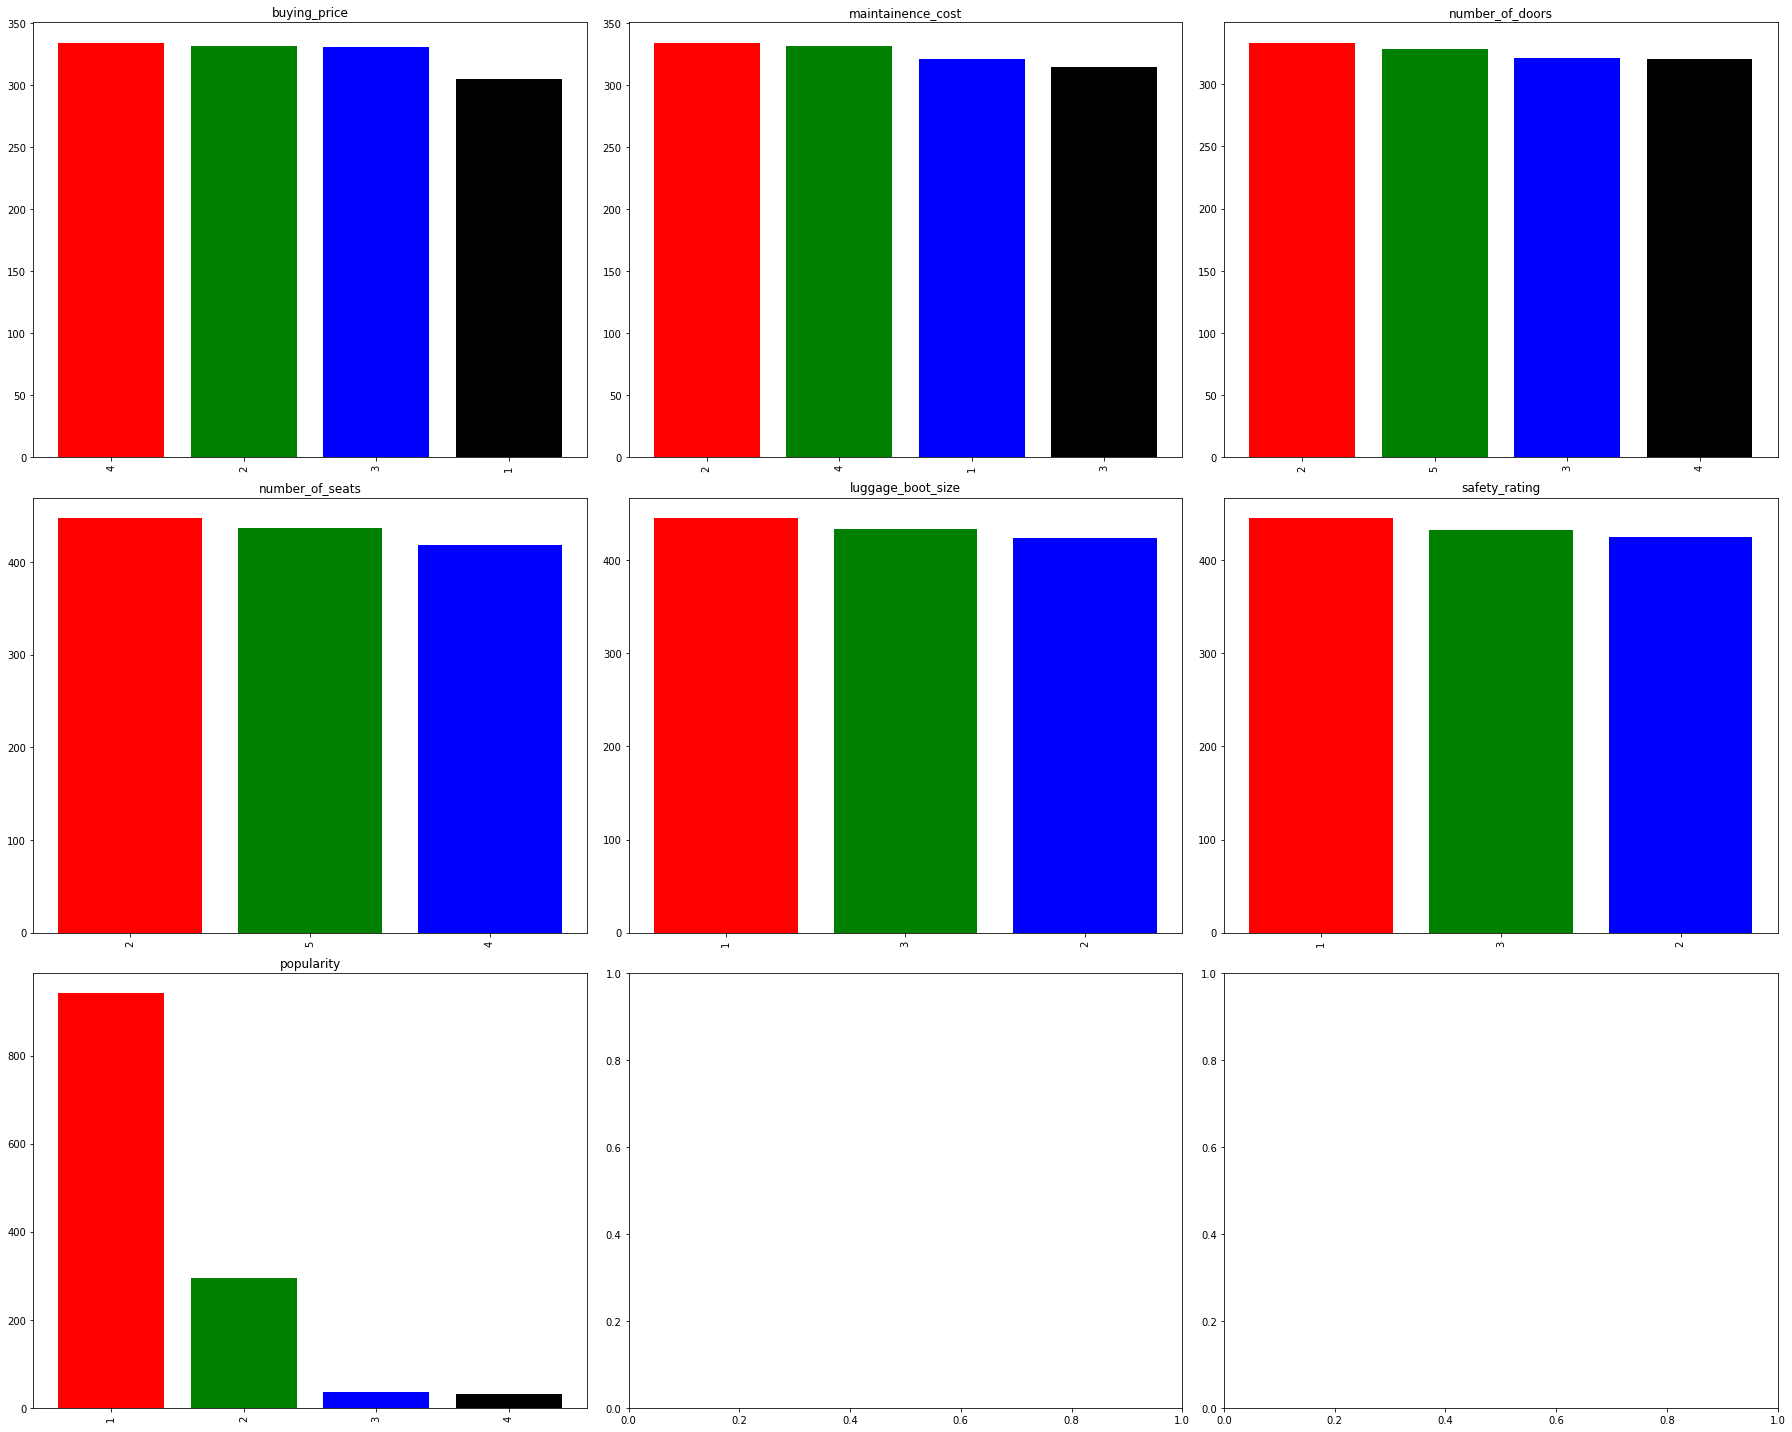

In [34]:
col = ['buying_price', 'maintainence_cost', 'number_of_doors','number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity']


fig, axis = plt.subplots(3, 3,  figsize=(25, 20))

counter = 0
for items in col:
    value_counts = df1[items].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    my_colors = 'rgbkymc'
    
    axis[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index,color=my_colors)
    
    axis[trace_x, trace_y].set_title(items)
    
    for tick in axis[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.tight_layout()
plt.show()

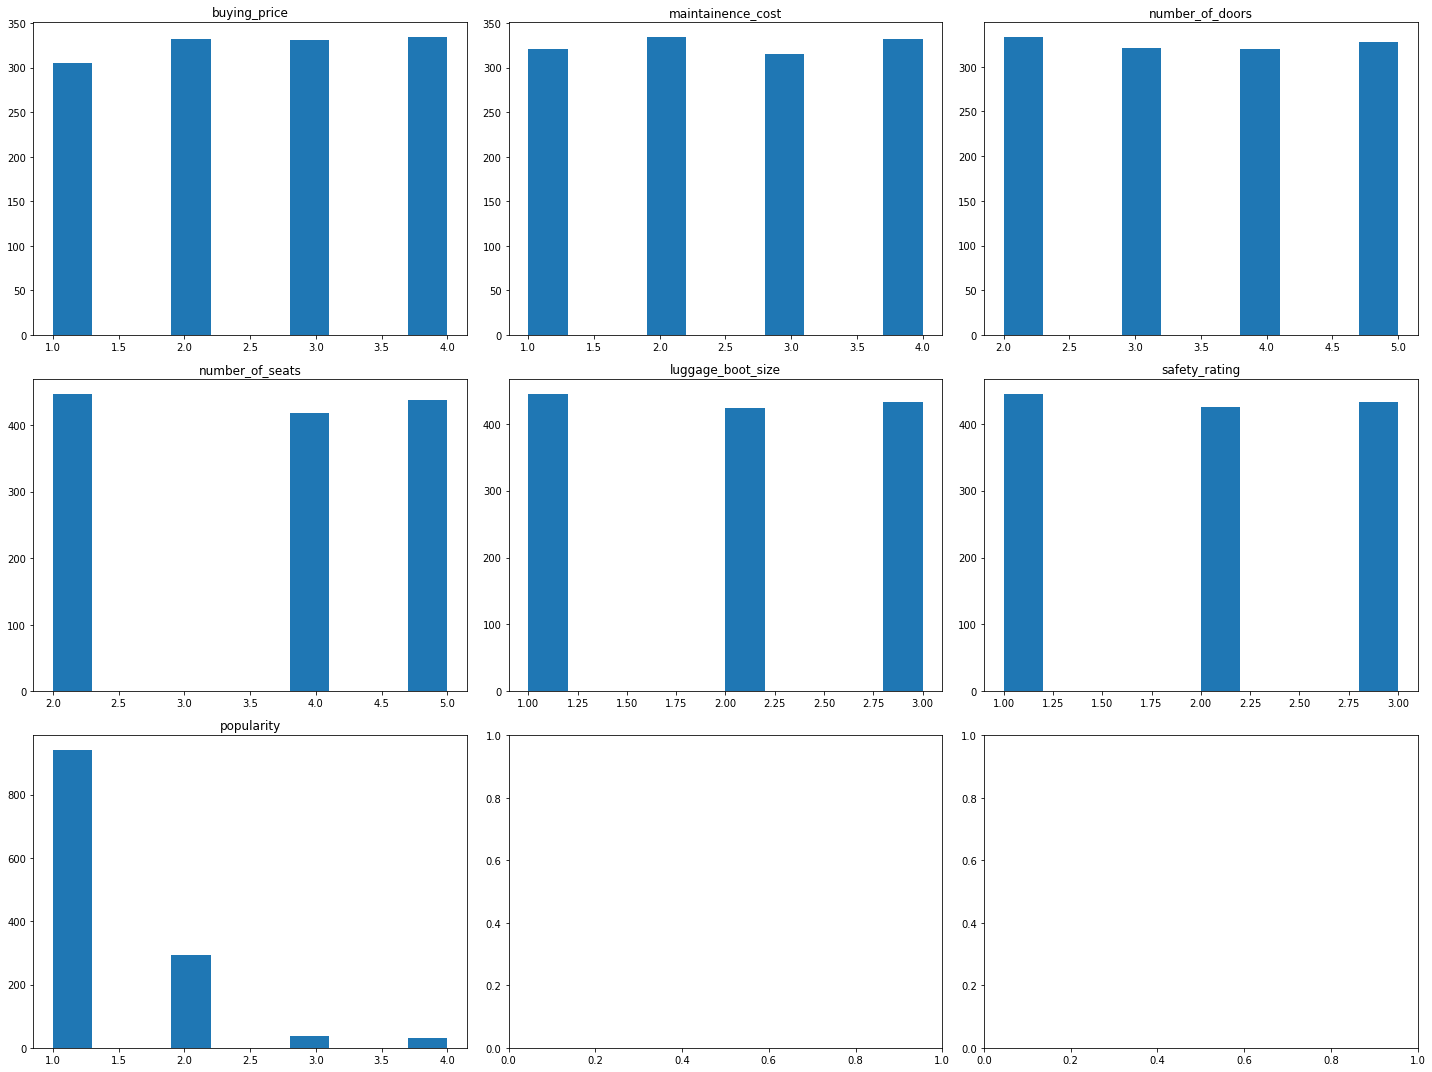

In [35]:
fig, axis = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for items in col:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    
    axis[trace_x, trace_y].hist(df1[items])
    
    axis[trace_x, trace_y].set_title(items)
    
    counter += 1

plt.tight_layout()
plt.show()

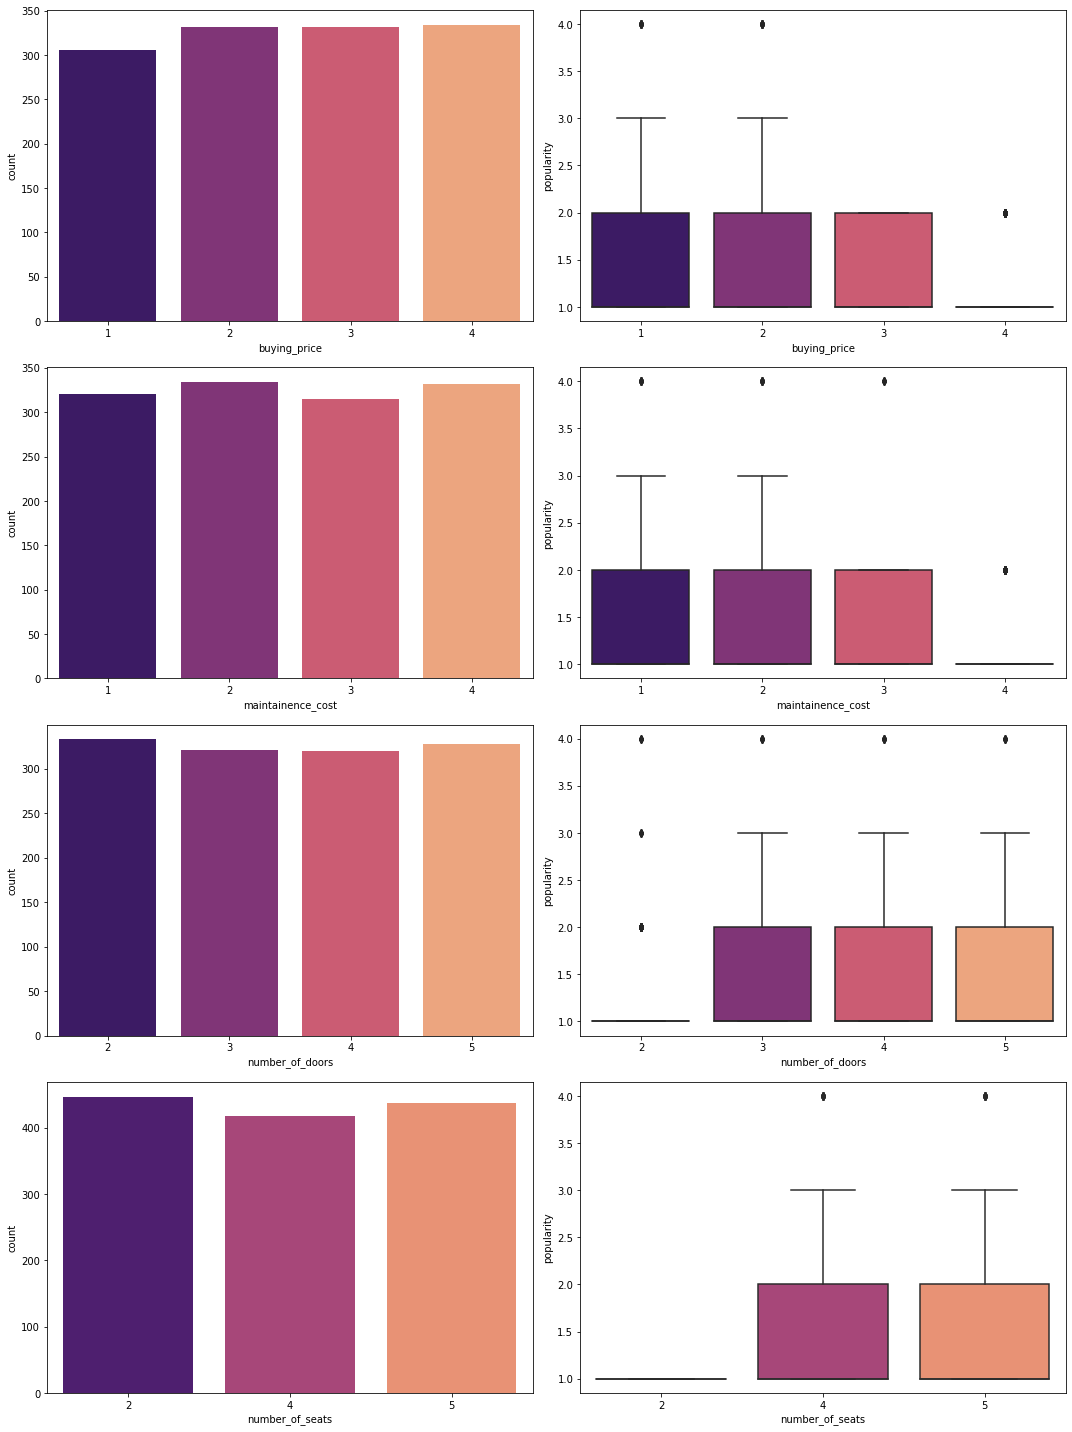

In [36]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
   
    sns.countplot(df1[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    
    sns.boxplot(x=df1[x], y=df1.popularity, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('buying_price', 1)
plot_count('maintainence_cost', 3)
plot_count('number_of_doors', 5)
plot_count('number_of_seats', 7)



plt.tight_layout()
plt.show()

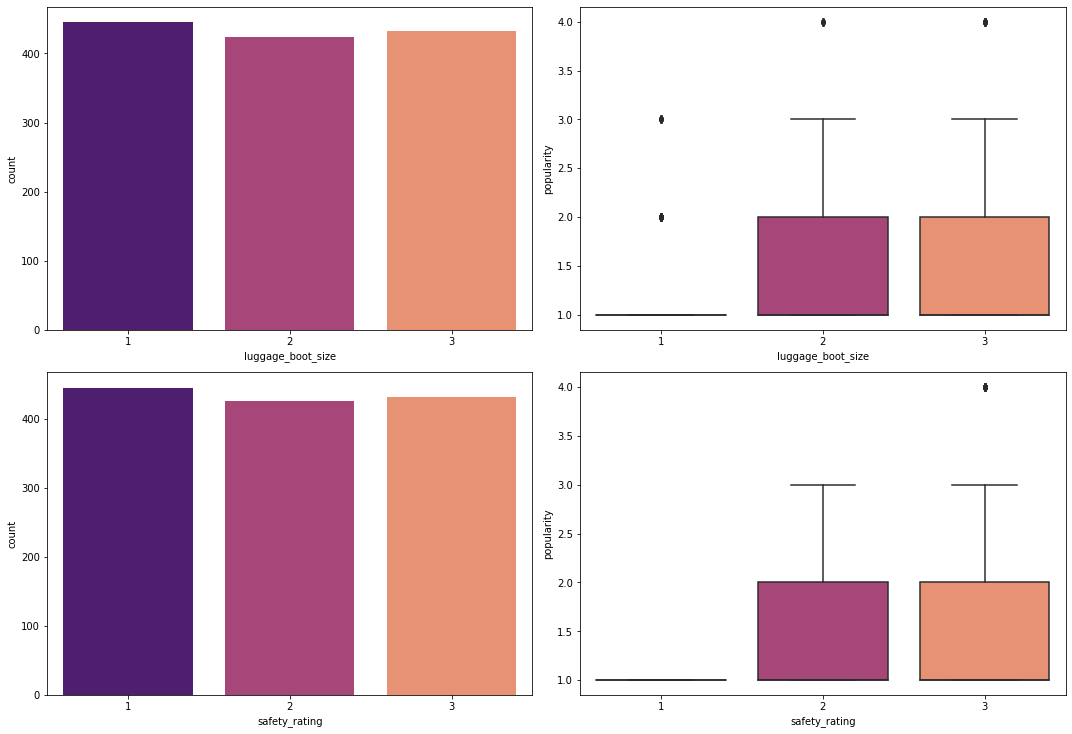

In [37]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
   
    sns.countplot(df1[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    
    sns.boxplot(x=df1[x], y=df1.popularity, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('luggage_boot_size', 1)
plot_count('safety_rating', 3)





plt.tight_layout()
plt.show()

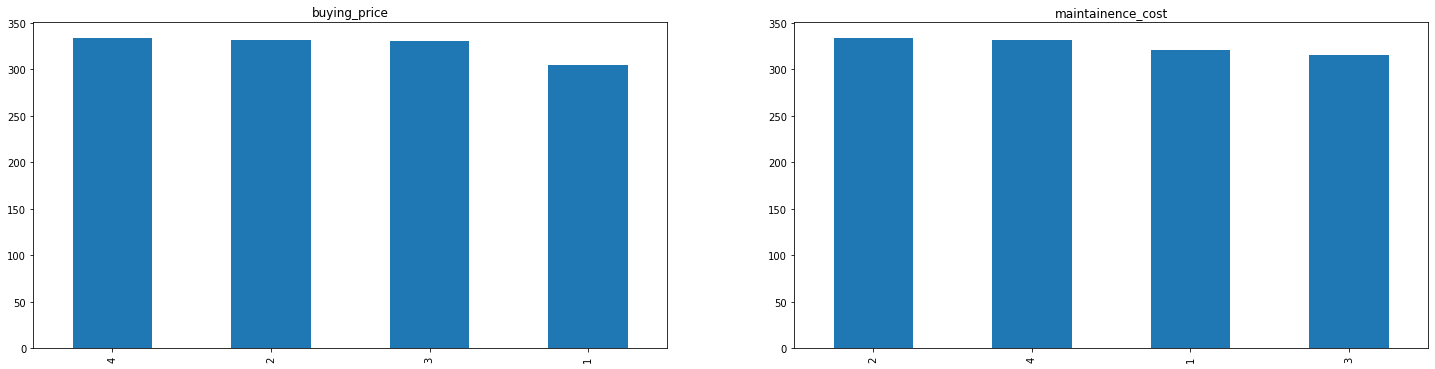

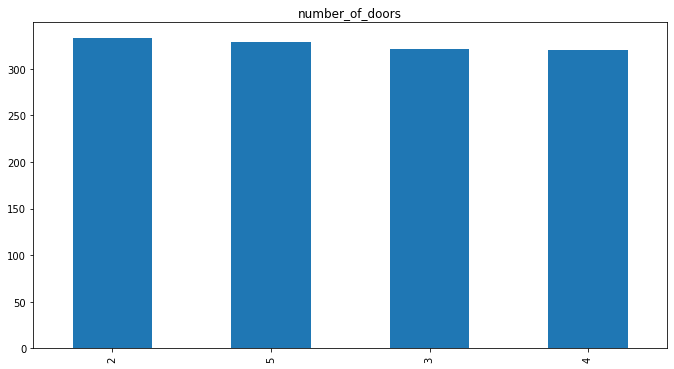

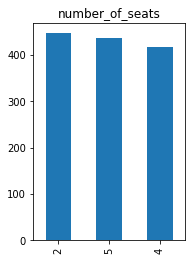

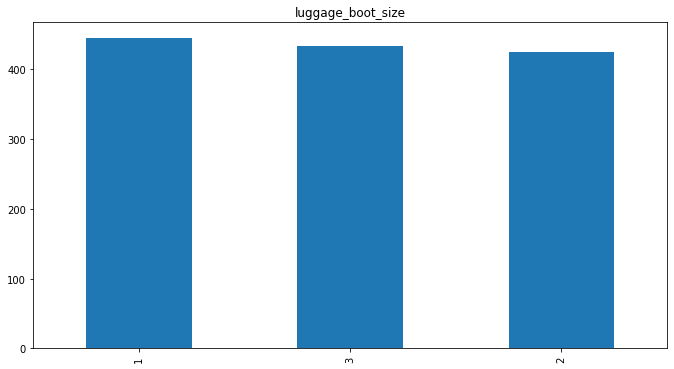

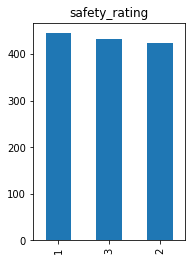

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(25, 6))


plt.subplot(1,2,1)
plt1 = df1.buying_price.value_counts().plot('bar')
plt.title('buying_price')


plt.subplot(1,2,2)
plt1 = df1.maintainence_cost.value_counts().plot('bar')
plt.title('maintainence_cost')

plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = df1.number_of_doors.value_counts().plot('bar')
plt.title('number_of_doors')
plt.show()

plt.subplot(1,2,2)
plt1 = df1.number_of_seats.value_counts().plot('bar')
plt.title('number_of_seats')
plt.show()


plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = df1.luggage_boot_size.value_counts().plot('bar')
plt.title('luggage_boot_size')
plt.show()

plt.subplot(1,2,2)
plt1 = df1.safety_rating.value_counts().plot('bar')
plt.title('safety_rating')
plt.show()



plt.tight_layout()
plt.show()

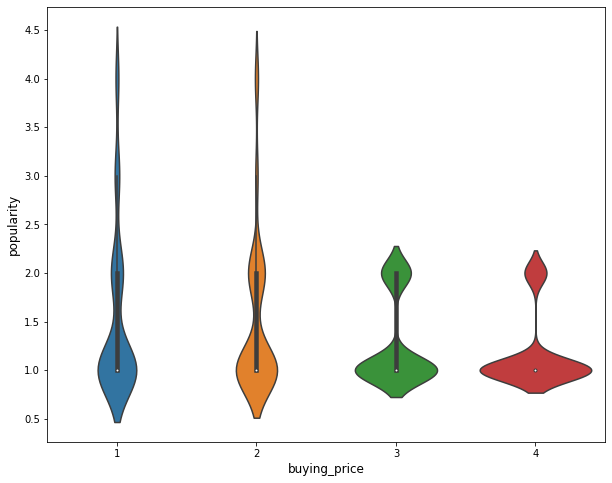

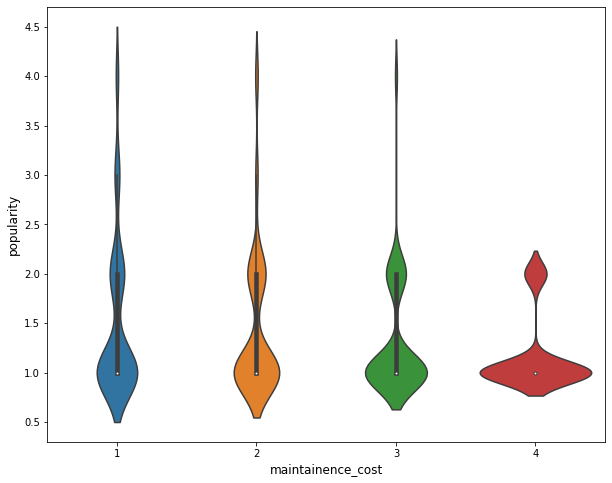

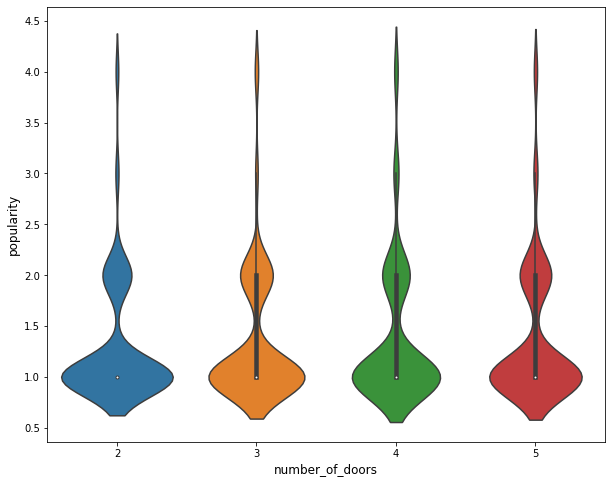

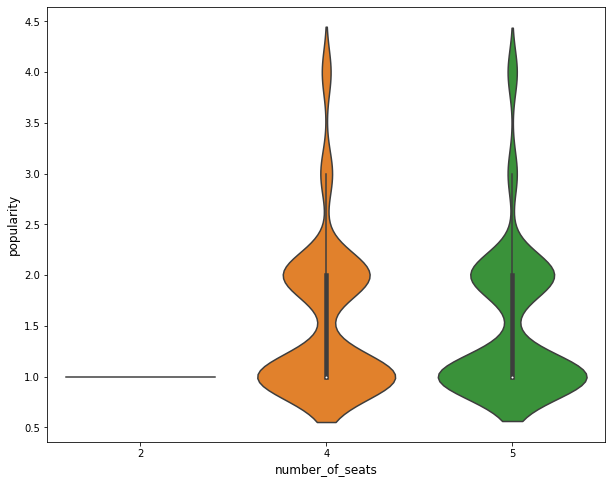

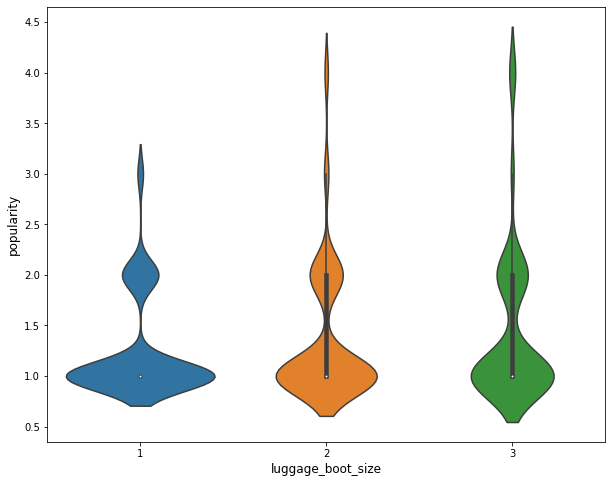

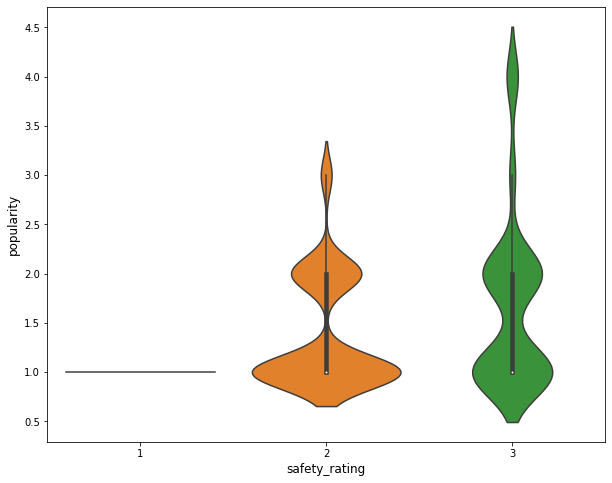

In [39]:
for item in col[:-1]:
    plt.figure(figsize=(10,8))
    sns.violinplot(df1[item],df1["popularity"])
    
    plt.xlabel(item,fontsize=12)
    plt.ylabel("popularity",fontsize=12)
    plt.show()

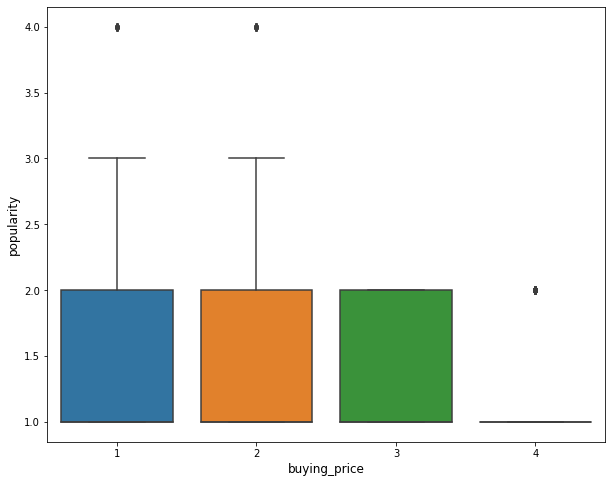

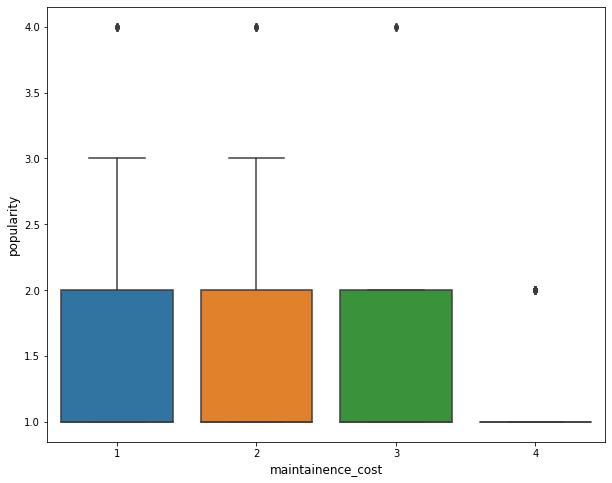

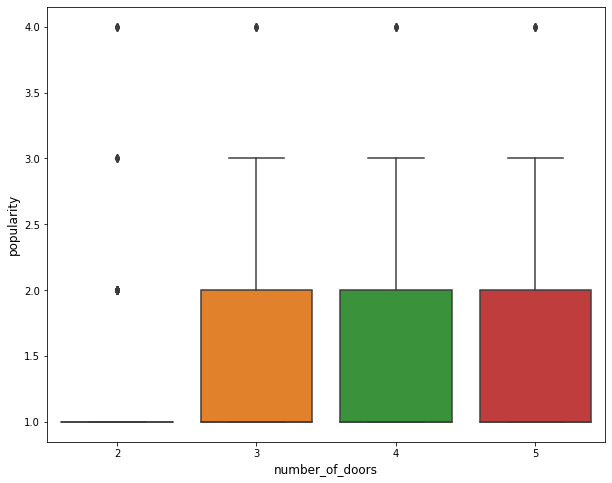

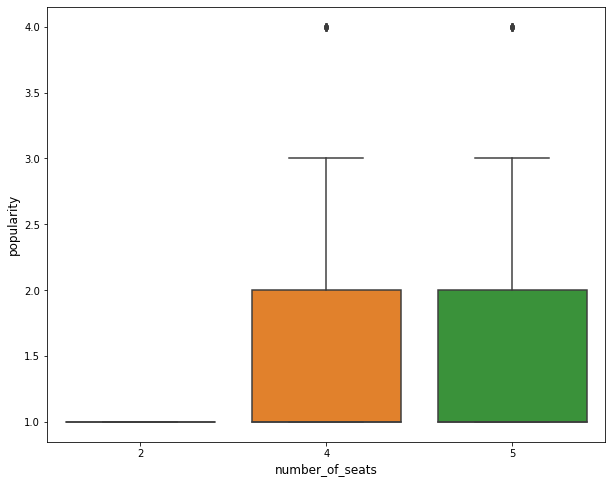

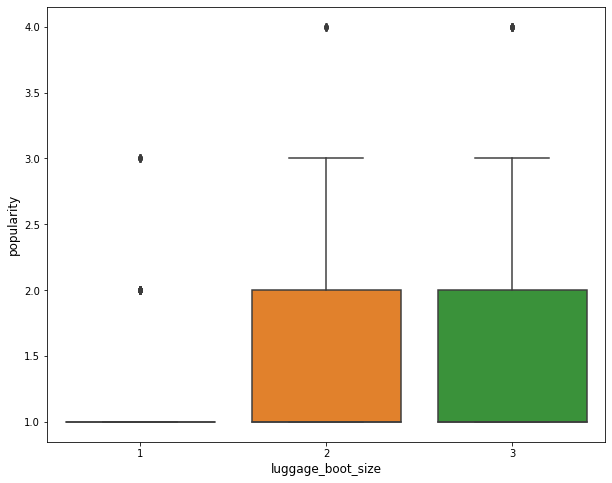

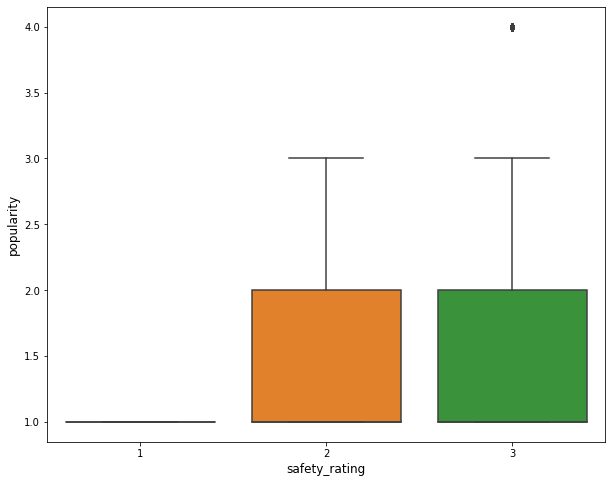

In [40]:
for item in col[:-1]:
    plt.figure(figsize=(10,8))
    sns.boxplot(df1[item],df1["popularity"])
    
    plt.xlabel(item,fontsize=12)
    plt.ylabel("popularity",fontsize=12)
    plt.show()

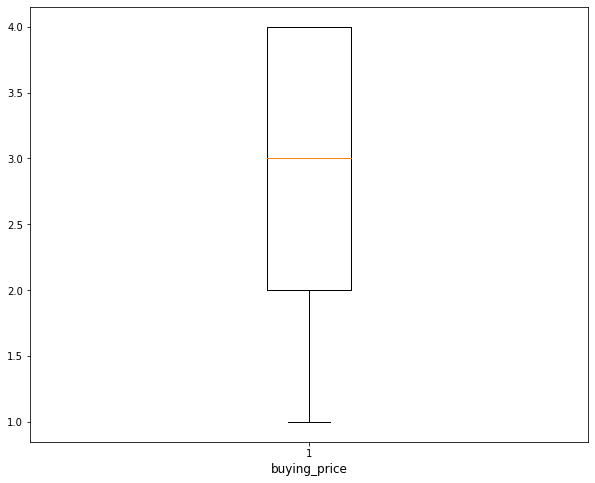

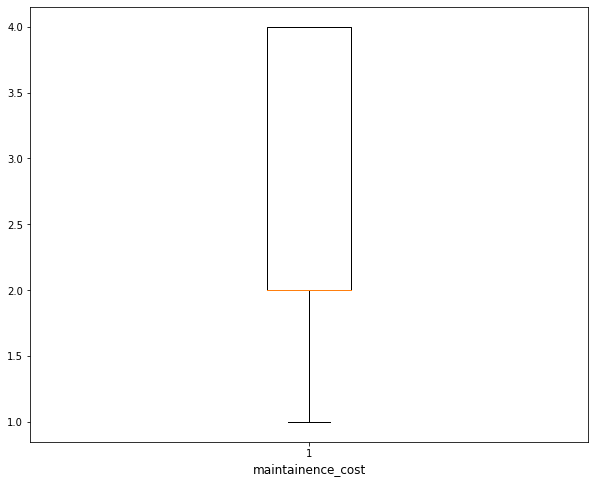

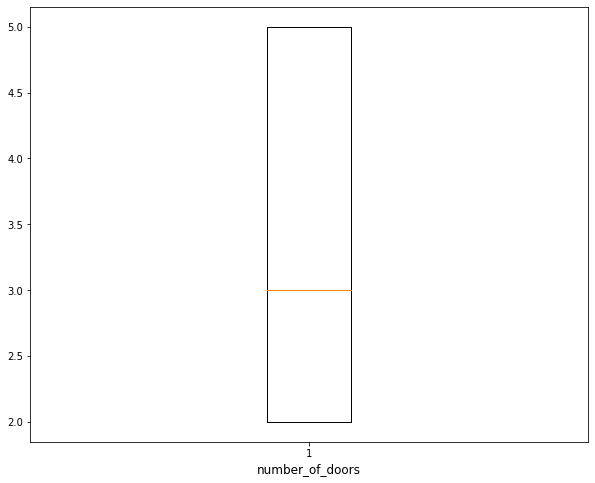

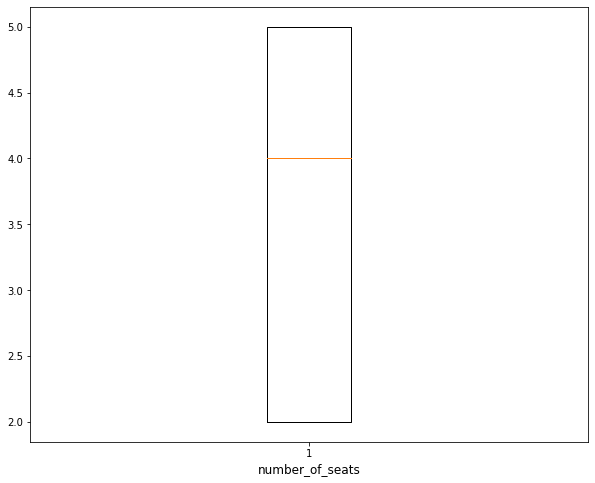

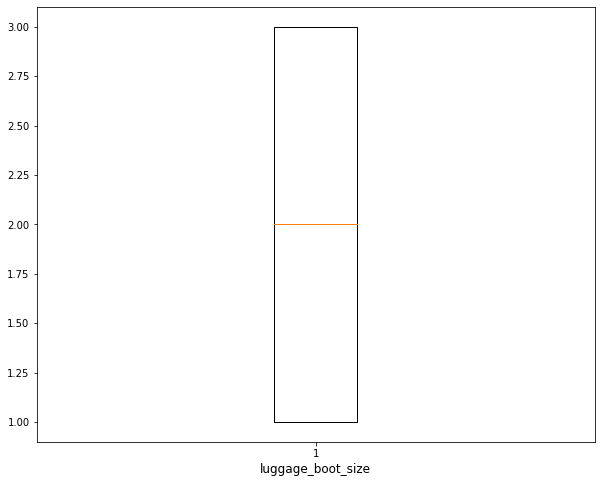

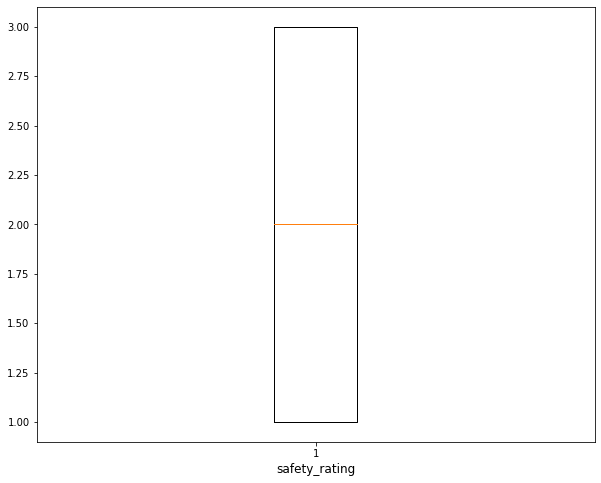

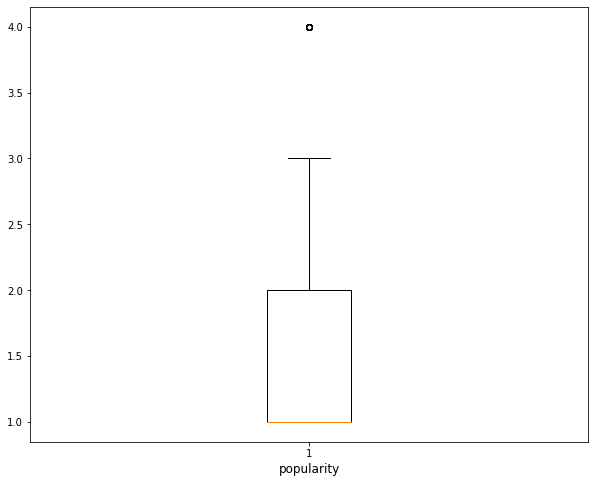

In [41]:
for item in col:
    plt.figure(figsize=(10,8))
    plt.boxplot(df1[item])
    
    plt.xlabel(item,fontsize=12)
    plt.show()

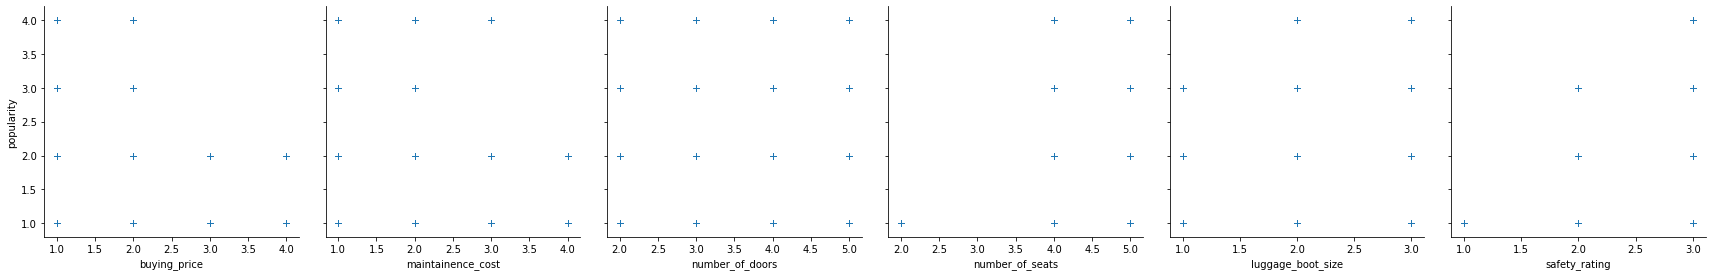

In [42]:
sns.pairplot(df1, x_vars=col[:-1], y_vars='popularity', markers="+", size=4)
plt.show()

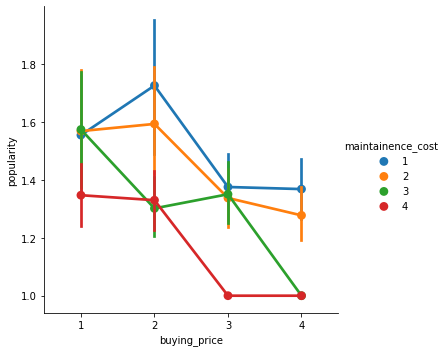

In [43]:
sns.catplot(x="buying_price", y="popularity", hue="maintainence_cost", kind="point", data=df1);

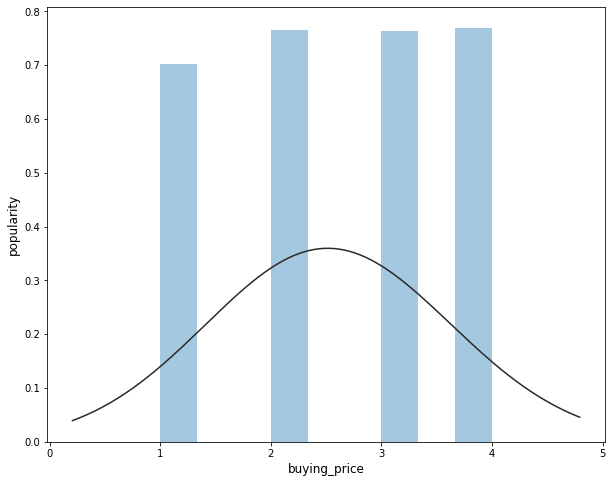

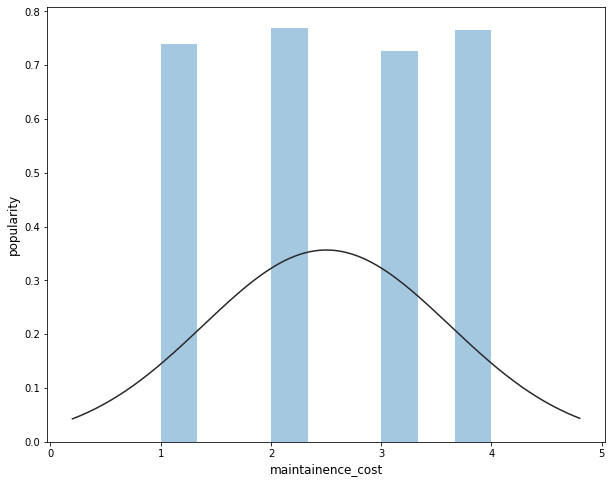

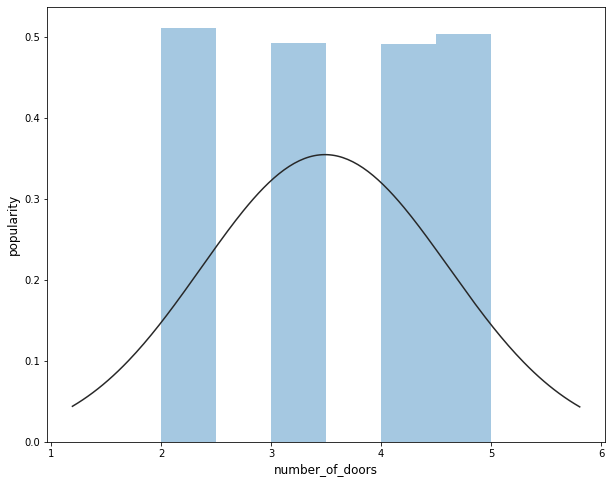

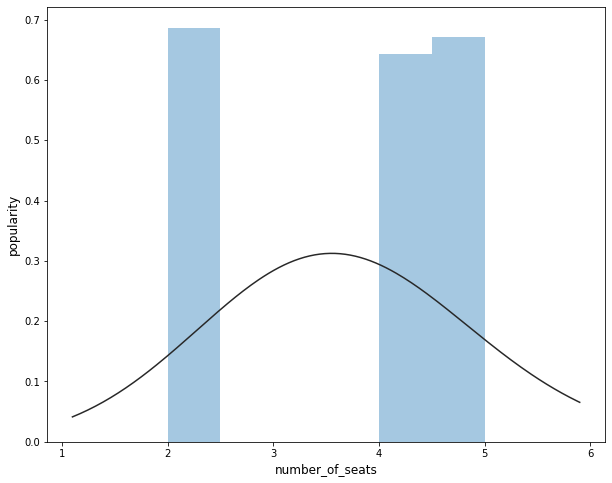

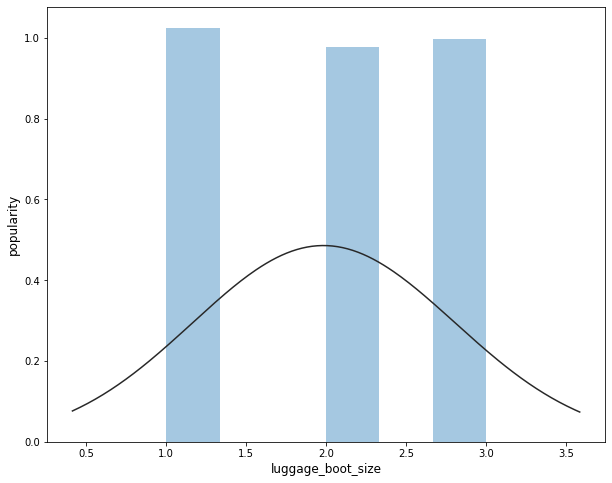

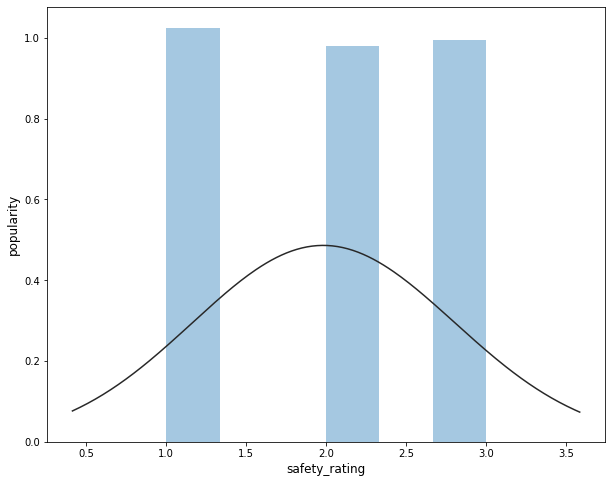

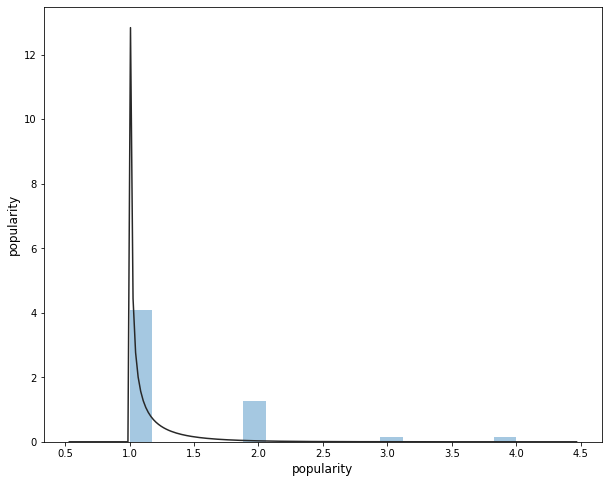

In [44]:
for item in df1[:-1]:
    plt.figure(figsize=(10,8))
   
    sns.distplot(df1[item], kde=False, fit=stats.gamma);
    
    plt.xlabel(item,fontsize=12)
    plt.ylabel("popularity",fontsize=12)
    plt.show()

# MODEL BUILDING

In [45]:
df1.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,4,5,4,2,2,1
1,2,3,5,4,2,2,2
2,3,3,3,4,3,2,2
3,3,2,4,4,2,3,2
4,1,4,3,5,1,3,2


In [46]:
X = df1.drop('popularity',axis=1)

In [47]:
y = df1[['popularity']]

In [48]:
X.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating
0,3,4,5,4,2,2
1,2,3,5,4,2,2
2,3,3,3,4,3,2
3,3,2,4,4,2,3
4,1,4,3,5,1,3


In [49]:
y.head()

,popularity
0,1
1,2
2,2
3,2
4,2


In [50]:
X.shape

(1302, 6)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Logistic Regression

In [52]:
log = Pipeline([('Log3',LogisticRegression())])

In [53]:
log.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Log3',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [54]:
pred = log.predict(X_test)

In [55]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[269  10   0   1]
 [ 40  51   2   0]
 [  2   8   1   0]
 [  0   7   0   0]]
              precision    recall  f1-score   support

           1       0.86      0.96      0.91       280
           2       0.67      0.55      0.60        93
           3       0.33      0.09      0.14        11
           4       0.00      0.00      0.00         7

    accuracy                           0.82       391
   macro avg       0.47      0.40      0.41       391
weighted avg       0.79      0.82      0.80       391

0.8209718670076727


# Log Reg With Scalar,Pca

In [56]:
log2 = Pipeline([('Scalar',MinMaxScaler()),
                 ('Pca',PCA()),
                 ('Log3',LogisticRegression())])

In [57]:
log2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('Log3',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [58]:
pred2 = log2.predict(X_test)

In [59]:
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))
print(accuracy_score(y_test,pred2))

[[268  12   0   0]
 [ 38  55   0   0]
 [  2   9   0   0]
 [  0   7   0   0]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91       280
           2       0.66      0.59      0.62        93
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         7

    accuracy                           0.83       391
   macro avg       0.38      0.39      0.38       391
weighted avg       0.78      0.83      0.80       391

0.8260869565217391


In [60]:
a=metrics.confusion_matrix(y_test,pred2)

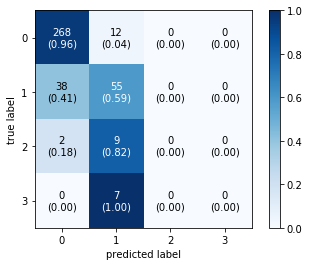

In [61]:
fig, ax = plot_confusion_matrix(conf_mat=a,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

THE SCALE AND PCA HAVE NOT MUCH IMPROVED MODEL PERFORMANCE ALTHOUGH LETS CHECK IT WITH OTHER MODELS

In [62]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             popularity   No. Observations:                  911
Model:                            GLM   Df Residuals:                      904
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 29 Jan 2020   Deviance:                          nan
Time:                        15:17:07   Pearson chi2:                 2.66e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.536e+17   1.44e+07  -1.07e+10      0.000   -1.54e+17   -1.54e+17
buying_price      -4.026e+16   2.04e+06  -1.97e+10      0.000   -4.03e+16   -4.03e+16
maintainence_cost -3.371e+16   2.02e+06  -1.67e+10      0.000   -3.37e+16   -3.37e+16
number_of_doors     1.49e+16   1.96e+06   7.61e+09      0.000    1.49e+16    1.49e+16
number_of_seats    5.608e+16   1.75e+06    3.2e+10      0.000    5.61e+16    5.61e+16
luggage_boot_size  3.605e+16   2.72e+06   1.32e+10      0.000    3.61e+16    3.61e+16
safety_rating       1.02e+17   2.69e+06    3.8e+10      0.000    1.02e+17    1.02e+17
=====================================================================================
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 25)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,number_of_doors,7.859102
3,number_of_seats,7.064128
4,luggage_boot_size,6.141313
5,safety_rating,5.870001
0,buying_price,5.828524
1,maintainence_cost,5.544938


# Random Forest

In [64]:
rf2 = Pipeline([
              ('Scalar',MinMaxScaler()),
              ('Pca',PCA()),
              ('Rf',RandomForestClassifier())])

In [65]:
rf2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('Rf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=Fal

In [66]:
pred_rf2 = rf2.predict(X_test)

In [67]:
print(confusion_matrix(y_test,pred_rf2))
print(classification_report(y_test,pred_rf2))
print(accuracy_score(y_test,pred_rf2))

[[279   1   0   0]
 [  9  81   2   1]
 [  0   3   8   0]
 [  0   3   0   4]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       280
           2       0.92      0.87      0.90        93
           3       0.80      0.73      0.76        11
           4       0.80      0.57      0.67         7

    accuracy                           0.95       391
   macro avg       0.87      0.79      0.83       391
weighted avg       0.95      0.95      0.95       391

0.9514066496163683


# Random Forest With Hyper Parameter Tuning

In [68]:
rf = RandomForestClassifier()

In [69]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_macro')

In [70]:
scores.mean()

0.7781370282733265

In [71]:
rf.fit(X_train, y_train)
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

In [72]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
print('The Training F1 Score is', f1_score(train_predictions, y_train,average='macro'))
print('The Testing F1 Score is', f1_score(test_predictions, y_test,average='macro'))

The Training F1 Score is 0.9875288035892017
The Testing F1 Score is 0.8596935032689224


In [74]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [75]:
parameters = {   
              'max_depth':[10,20,30,40], 
              'min_samples_leaf':[1,2,3,4,5], 
              'min_samples_split':[2,3,4,5],
              'n_estimators': [10, 30, 50, 100],
              'criterion' : ['gini','entropy']}
scorer = make_scorer(f1_score,average ='macro')

In [76]:
@timeit
def generate_model_from_search(grid_or_random,model, parameters, scorer, X, y):
    if grid_or_random == "Grid":
        search_obj = GridSearchCV(model, parameters, scoring=scorer)
    elif grid_or_random == "Random":
        search_obj = RandomizedSearchCV(model, parameters, scoring=scorer)
    fit_obj = search_obj.fit(X, y)
    best_model = fit_obj.best_estimator_
    return best_model

In [77]:
best_model_random = generate_model_from_search("Random", 
                                           rf, 
                                           parameters, 
                                           scorer, 
                                           X_train, 
                                           y_train,
                                            )

'generate_model_from_search'  2337.87 ms


In [78]:
best_model_random.fit(X_train, y_train)
best_train_predictions = best_model_random.predict(X_train)
best_test_predictions = best_model_random.predict(X_test)

print('The training F1 Score is', f1_score(best_train_predictions, y_train,average='macro'))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test,average='macro'))

The training F1 Score is 0.9867369681815231
The testing F1 Score is 0.8224344366689593


In [79]:
print(classification_report(y_test,best_test_predictions))
print(confusion_matrix(y_test,best_test_predictions))
print(accuracy_score(y_test,best_test_predictions))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       280
           2       0.90      0.95      0.92        93
           3       0.75      0.82      0.78        11
           4       1.00      0.43      0.60         7

    accuracy                           0.96       391
   macro avg       0.91      0.79      0.82       391
weighted avg       0.96      0.96      0.96       391

[[275   5   0   0]
 [  3  88   2   0]
 [  0   2   9   0]
 [  0   3   1   3]]
0.959079283887468


In [80]:
a = metrics.confusion_matrix(y_test,best_test_predictions)

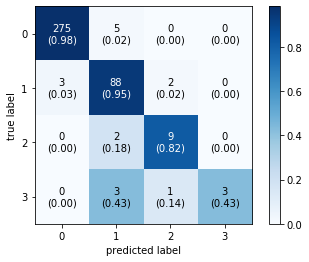

In [81]:
fig, ax = plot_confusion_matrix(conf_mat=a,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# KNN

In [82]:
knn = Pipeline([('Scalar',MinMaxScaler()),
                ('Pca',PCA()),
                ('knn',KNeighborsClassifier())])

In [83]:
knn.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [84]:
pred_knn = knn.predict(X_test)

In [85]:
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print(accuracy_score(y_test,pred_knn))

[[272   8   0   0]
 [  6  85   2   0]
 [  1   1   9   0]
 [  0   3   0   4]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       280
           2       0.88      0.91      0.89        93
           3       0.82      0.82      0.82        11
           4       1.00      0.57      0.73         7

    accuracy                           0.95       391
   macro avg       0.92      0.82      0.85       391
weighted avg       0.95      0.95      0.95       391

0.9462915601023018


In [86]:
a=(confusion_matrix(y_test,pred_knn))

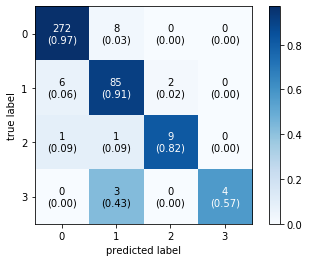

In [87]:
fig, ax = plot_confusion_matrix(conf_mat=a,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# SVM

In [88]:
svm = Pipeline([('Scalar',MinMaxScaler()),
              ('Pca',PCA()),
              ('svm',LinearSVC())])

In [89]:
svm.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scalar', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svm',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [90]:
pred_svm = svm.predict(X_test)

In [91]:
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))
print(accuracy_score(y_test,pred_svm))

[[267  13   0   0]
 [ 36  57   0   0]
 [  1  10   0   0]
 [  0   7   0   0]]
              precision    recall  f1-score   support

           1       0.88      0.95      0.91       280
           2       0.66      0.61      0.63        93
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         7

    accuracy                           0.83       391
   macro avg       0.38      0.39      0.39       391
weighted avg       0.78      0.83      0.81       391

0.8286445012787724


In [92]:
a=(confusion_matrix(y_test,pred_svm))

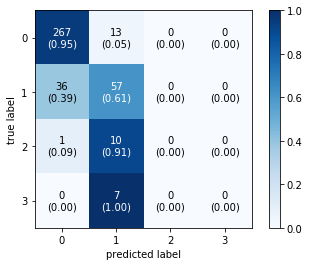

In [93]:
fig, ax = plot_confusion_matrix(conf_mat=a,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Decision Tree With curves and Tuning

In [94]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test, y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           1       0.93      0.95      0.94       280
           2       0.76      0.73      0.75        93
           3       0.38      0.55      0.44        11
           4       0.00      0.00      0.00         7

    accuracy                           0.87       391
   macro avg       0.52      0.56      0.53       391
weighted avg       0.86      0.87      0.86       391

[[266  12   2   0]
 [ 20  68   5   0]
 [  0   5   6   0]
 [  0   4   3   0]]
0.8695652173913043


In [96]:
features = list(df1.columns[:-1])
features

['buying_price',
 'maintainence_cost',
 'number_of_doors',
 'number_of_seats',
 'luggage_boot_size',
 'safety_rating']

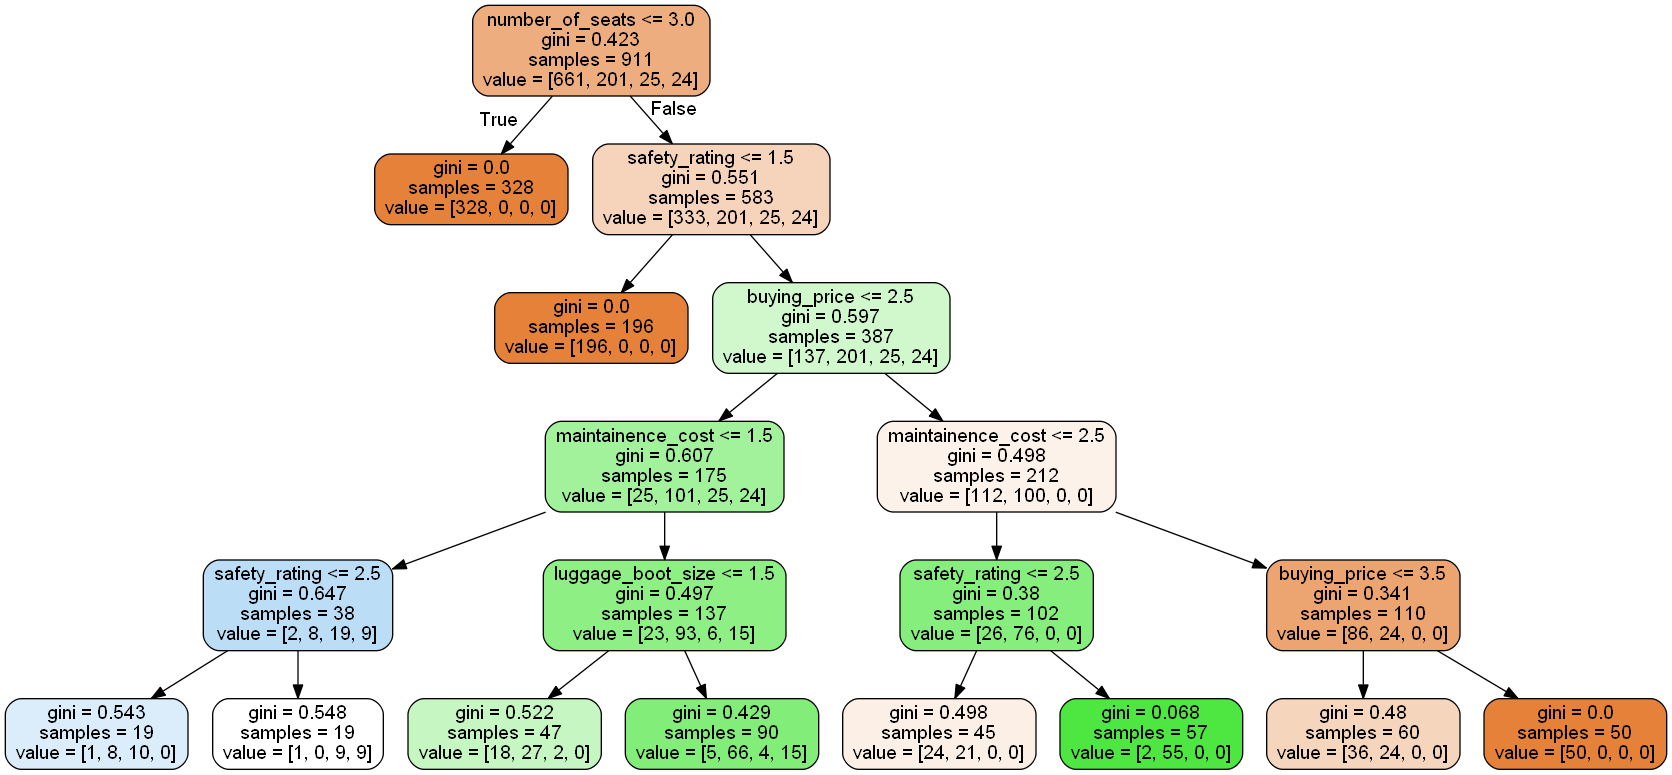

In [97]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9]}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [99]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004887,0.001058,0.001680,0.002060,1,{'max_depth': 1},0.722826,0.725275,0.725275,0.725275,...,0.725576,0.002076,9,0.726272,0.725652,0.725652,0.725652,0.724658,0.725577,0.000519
1,0.005635,0.001369,0.001206,0.001600,2,{'max_depth': 2},0.788043,0.791209,0.796703,0.813187,...,0.795829,0.009137,8,0.797799,0.796982,0.795610,0.791495,0.797260,0.795829,0.002284
2,0.005565,0.002181,0.001495,0.001840,3,{'max_depth': 3},0.771739,0.791209,0.818681,0.802198,...,0.796926,0.015435,7,0.819807,0.813443,0.806584,0.810700,0.810959,0.812299,0.004352
3,0.004515,0.001535,0.001307,0.001676,4,{'max_depth': 4},0.836957,0.835165,0.846154,0.868132,...,0.846323,0.011740,6,0.854195,0.868313,0.865569,0.877915,0.865753,0.866349,0.007567
4,0.005677,0.001840,0.002120,0.002262,5,{'max_depth': 5},0.836957,0.873626,0.862637,0.846154,...,0.856202,0.013050,5,0.889959,0.880658,0.886145,0.887517,0.883562,0.885568,0.003211


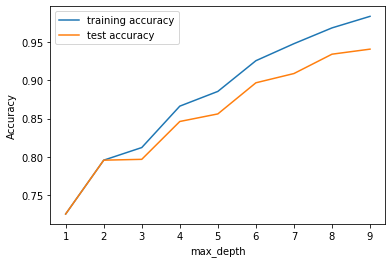

In [100]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# 1 2 3 4
# 8

In [101]:
n_folds = 5
parameters = {'min_samples_leaf': [1,2,3]}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
     

In [102]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007691,0.001970,0.002876,0.001763,1,{'min_samples_leaf': 1},0.951087,0.950549,0.967033,0.950549,...,0.950604,0.010523,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.006963,0.005164,0.001222,0.001627,2,{'min_samples_leaf': 2},0.956522,0.923077,0.934066,0.928571,...,0.933041,0.012524,3,0.983494,0.984911,0.984911,0.982167,0.984932,0.984083,0.001105
2,0.006802,0.008374,0.000000,0.000000,3,{'min_samples_leaf': 3},0.934783,0.928571,0.956044,0.945055,...,0.938529,0.010665,2,0.966988,0.978052,0.965706,0.973937,0.978082,0.972553,0.005302


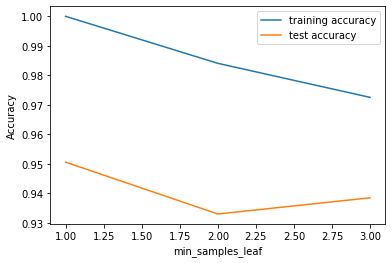

In [103]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# 1,2,3,4,5,6,7,8,9,10

In [104]:
n_folds = 5
parameters = {'min_samples_split': [5,10,15,20]}
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True

In [105]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006327,0.007749,0.003333,0.006157,5,{'min_samples_split': 5},0.929348,0.939560,0.939560,0.934066,...,0.934138,0.004842,2,0.979367,0.983539,0.980796,0.986283,0.983562,0.982709,0.002409
1,0.003532,0.006096,0.003136,0.006272,10,{'min_samples_split': 10},0.961957,0.928571,0.950549,0.928571,...,0.936334,0.017849,1,0.962861,0.967078,0.962963,0.968450,0.964384,0.965147,0.002246
2,0.005473,0.005547,0.001751,0.002367,15,{'min_samples_split': 15},0.945652,0.934066,0.923077,0.879121,...,0.915477,0.024731,3,0.949106,0.951989,0.942387,0.934156,0.956164,0.946761,0.007736
3,0.006991,0.000586,0.001385,0.002303,20,{'min_samples_split': 20},0.940217,0.912088,0.917582,0.879121,...,0.903403,0.026538,4,0.936726,0.930041,0.938272,0.934156,0.936986,0.935236,0.002921


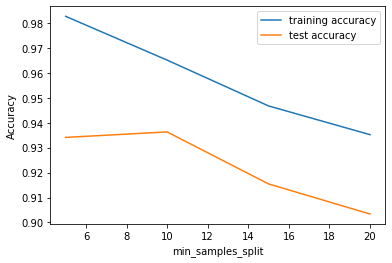

In [106]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [107]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}
n_folds = 5
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [108]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009031,0.007414,0.003609,0.006149,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.858696,...,0.863886,0.010347,1,0.865199,0.866941,0.860082,0.865569,0.861644,0.863887,0.002584
1,0.007025,0.008022,0.000000,0.000000,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.858696,...,0.863886,0.010347,1,0.865199,0.866941,0.860082,0.865569,0.861644,0.863887,0.002584
2,0.005977,0.000693,0.002325,0.002466,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.831522,...,0.809001,0.014354,9,0.803301,0.813443,0.806584,0.810700,0.810959,0.808997,0.003599
3,0.006388,0.003864,0.002380,0.002727,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.831522,...,0.809001,0.014354,9,0.803301,0.813443,0.806584,0.810700,0.810959,0.808997,0.003599
4,0.005176,0.003165,0.002494,0.002320,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.858696,...,0.863886,0.010347,1,0.865199,0.866941,0.860082,0.865569,0.861644,0.863887,0.002584
5,0.005722,0.002480,0.001547,0.002123,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.858696,...,0.863886,0.010347,1,0.865199,0.866941,0.860082,0.865569,0.861644,0.863887,0.002584
6,0.004767,0.002838,0.002585,0.002369,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.831522,...,0.809001,0.014354,9,0.803301,0.813443,0.806584,0.810700,0.810959,0.808997,0.003599
7,0.005616,0.002032,0.002172,0.002271,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.831522,...,0.809001,0.014354,9,0.803301,0.813443,0.806584,0.810700,0.810959,0.808997,0.003599
8,0.005035,0.001671,0.001387,0.001800,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.858696,...,0.863886,0.010347,1,0.865199,0.866941,0.860082,0.865569,0.861644,0.863887,0.002584
9,0.004854,0.003589,0.001323,0.002647,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.858696,...,0.863886,0.010347,1,0.865199,0.866941,0.860082,0.865569,0.861644,0.863887,0.002584


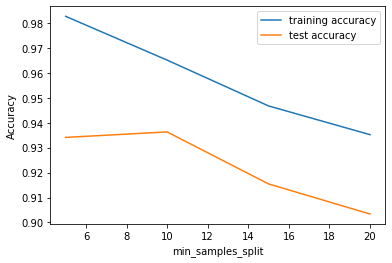

In [109]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [110]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8638858397365532
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


# Tree With Best Parameters

In [111]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [112]:
clf_gini.score(X_test,y_test)

0.8925831202046036

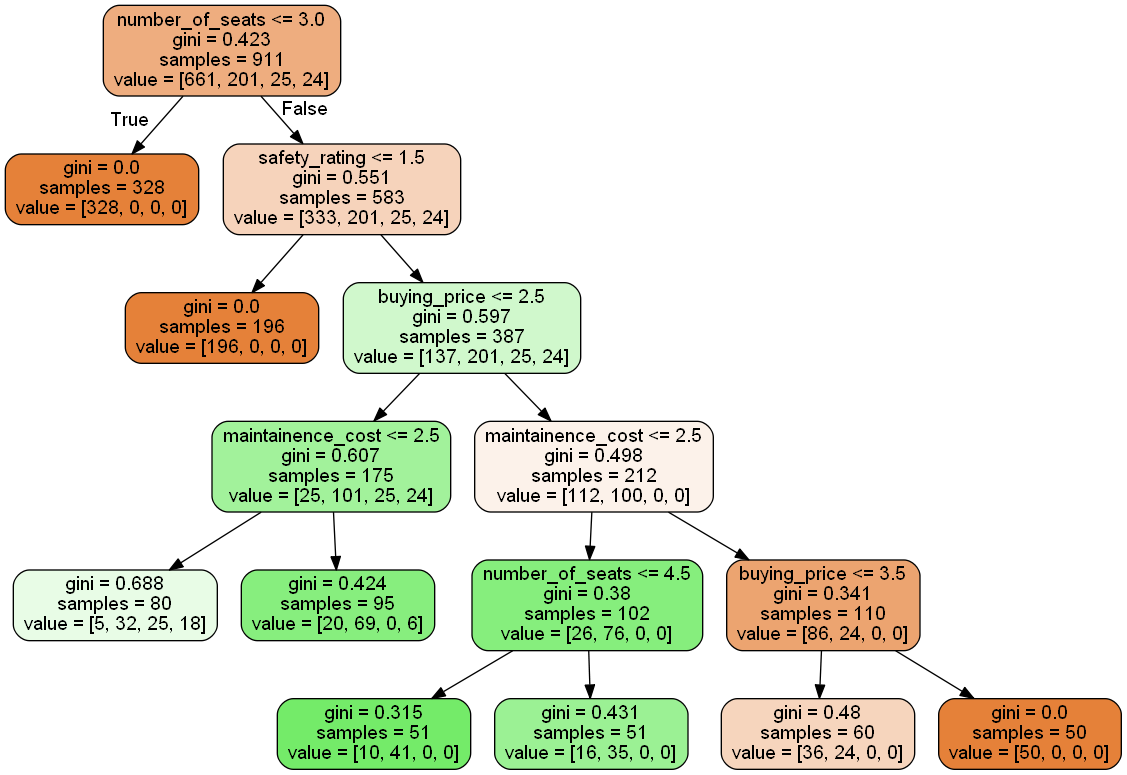

In [113]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Tree With Best Parameters -2

In [114]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

print(clf_gini.score(X_test,y_test))

0.8132992327365729


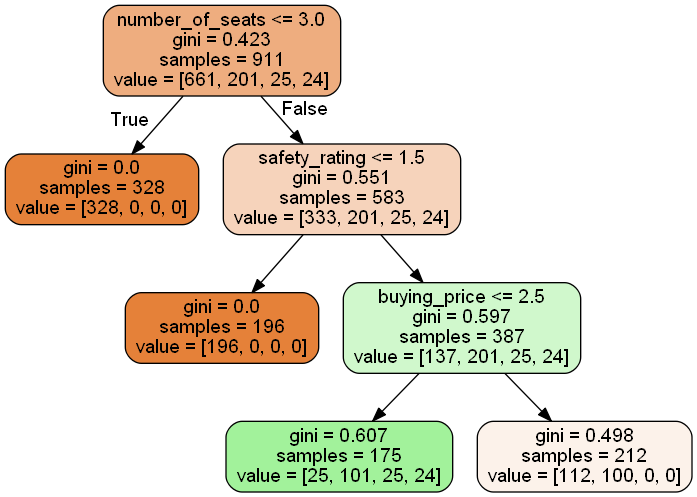

In [115]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [116]:
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           1       0.86      0.96      0.91       280
           2       0.62      0.54      0.58        93
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         7

    accuracy                           0.81       391
   macro avg       0.37      0.37      0.37       391
weighted avg       0.77      0.81      0.79       391

[[268  12   0   0]
 [ 43  50   0   0]
 [  0  11   0   0]
 [  0   7   0   0]]


0.8132992327365729

# Ensemble

# Xg Boost

In [117]:
classifier=xgboost.XGBClassifier()
Regressor =xgboost.XGBRegressor()

In [118]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]


hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [119]:
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=100)

In [120]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   35.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                   

In [121]:
 random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=None, n_estimators=1100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [122]:
regressor=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=None, n_estimators=1100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [123]:
regressor.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=None, n_estimators=1100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [124]:
pred = regressor.predict(X_test)

In [125]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

[[280   0   0   0]
 [  3  87   2   1]
 [  0   0  11   0]
 [  0   0   1   6]]
0.9820971867007673
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       280
           2       1.00      0.94      0.97        93
           3       0.79      1.00      0.88        11
           4       0.86      0.86      0.86         7

    accuracy                           0.98       391
   macro avg       0.91      0.95      0.92       391
weighted avg       0.98      0.98      0.98       391



# Xg Boost With Right Parameters

In [154]:
booster=['gbtree','gblinear']
base_score=[1,5,10]

n_estimators = [10,20,30]
max_depth = [1,5,8]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[2,3,4,5]
min_samples_split=[1]
min_samples_leaf = [10]


hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }
scorer = make_scorer(f1_score,average ='macro')

In [155]:
@timeit
def generate_model_from_search(grid_or_random,regressor, hyperparameter_grid, scorer, X, y):
    if grid_or_random == "Grid":
        search_obj = GridSearchCV(regressor,hyperparameter_grid, scoring=scorer)
    elif grid_or_random == "Random":
        search_obj = RandomizedSearchCV(regressor,hyperparameter_grid, scoring=scorer)
    fit_obj = search_obj.fit(X, y)
    best_model = fit_obj.best_estimator_
    return best_model

In [156]:
best_model_random = generate_model_from_search("Random", 
                                           regressor, 
                                           hyperparameter_grid, 
                                           scorer, 
                                           X_train, 
                                           y_train,
                                           )

'generate_model_from_search'  2157.58 ms


In [157]:
scores = cross_val_score(best_model_random, X_train, y_train, cv=5,n_jobs=-1, verbose=1, scoring='f1_macro')
scores.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.8713962004634859

In [158]:
best_model_random.fit(X_train, y_train)
best_train_predictions = best_model_random.predict(X_train)
best_test_predictions = best_model_random.predict(X_test)

print('The training F1 Score is', f1_score(best_train_predictions, y_train,average='macro'))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test,average='macro'))

The training F1 Score is 0.9847313247035259
The testing F1 Score is 0.9082207494998192


In [159]:
print(confusion_matrix(y_test,best_test_predictions))
print(classification_report(y_test,best_test_predictions))
print(accuracy_score(y_test,best_test_predictions))

[[277   3   0   0]
 [  2  88   2   1]
 [  0   1  10   0]
 [  0   0   1   6]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       280
           2       0.96      0.95      0.95        93
           3       0.77      0.91      0.83        11
           4       0.86      0.86      0.86         7

    accuracy                           0.97       391
   macro avg       0.89      0.93      0.91       391
weighted avg       0.98      0.97      0.97       391

0.9744245524296675


In [160]:
a=(confusion_matrix(y_test,best_test_predictions))

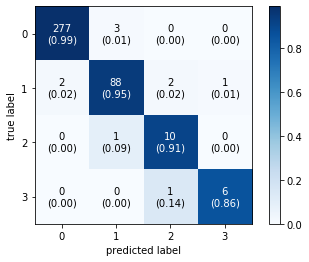

In [161]:
fig, ax = plot_confusion_matrix(conf_mat=a,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [162]:
best_test_predictionsX = best_model_random.predict(df2)
best_test_predictionsX

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 4, 1, 3, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       4, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 4, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1,

In [163]:
submit = pd.DataFrame({'Popularity': best_test_predictionsX})

submit.to_csv('Car_Popularity_Predictions.csv',index=False)

In [136]:
rf.feature_importances_

array([0.15344752, 0.14946446, 0.07700081, 0.28372815, 0.08703257,
       0.24932651])

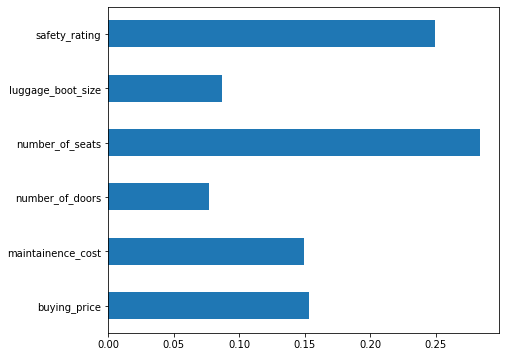

In [169]:
feature_importance = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importance.sort_values()
feature_importance.plot(kind='barh',figsize=(7,6));

In [170]:
Scalar = MinMaxScaler()

In [171]:
X_train = Scalar.fit_transform(X_train)

In [172]:
X_test = Scalar.fit_transform(X_test)

# Deep Learning Sample Test

In [173]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [174]:
classifier = Sequential()

In [191]:
classifier.add(Dense(output_dim = 512, init = 'uniform',activation='relu',input_dim =6))
classifier.add(Dense(output_dim = 128, init = 'uniform',activation='relu'))
classifier.add(Dense(output_dim = 128, init = 'uniform',activation='relu'))
classifier.add(Dense(output_dim = 64, init = 'uniform',activation='relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform',activation='softmax'))

In [192]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [193]:
classifier.fit(X_train,y_train,batch_size=10,nb_epoch=100)

Epoch 1/100
911/911 [==============================] - 4s 4ms/step - loss: -5.6525 - acc: 0.7256
Epoch 2/100
911/911 [==============================] - 1s 562us/step - loss: -5.6525 - acc: 0.7256
Epoch 3/100
911/911 [==============================] - 1s 555us/step - loss: -5.6525 - acc: 0.7256
Epoch 4/100
911/911 [==============================] - 0s 545us/step - loss: -5.6525 - acc: 0.7256
Epoch 5/100
911/911 [==============================] - 0s 548us/step - loss: -5.6525 - acc: 0.7256
Epoch 6/100
911/911 [==============================] - 1s 567us/step - loss: -5.6525 - acc: 0.7256
Epoch 7/100
911/911 [==============================] - 0s 546us/step - loss: -5.6525 - acc: 0.7256
Epoch 8/100
911/911 [==============================] - 1s 558us/step - loss: -5.6525 - acc: 0.7256
Epoch 9/100
911/911 [==============================] - 1s 561us/step - loss: -5.6525 - acc: 0.7256
Epoch 10/100
911/911 [==============================] - 0s 544us/step - loss: -5.6525 - acc: 0.7256
Epoch 11/10

911/911 [==============================] - 1s 620us/step - loss: -5.6525 - acc: 0.7256
Epoch 83/100
911/911 [==============================] - 1s 673us/step - loss: -5.6525 - acc: 0.7256
Epoch 84/100
911/911 [==============================] - 1s 697us/step - loss: -5.6525 - acc: 0.7256
Epoch 85/100
911/911 [==============================] - 1s 677us/step - loss: -5.6525 - acc: 0.7256
Epoch 86/100
911/911 [==============================] - 1s 659us/step - loss: -5.6525 - acc: 0.7256
Epoch 87/100
911/911 [==============================] - 1s 574us/step - loss: -5.6525 - acc: 0.7256
Epoch 88/100
911/911 [==============================] - 0s 540us/step - loss: -5.6525 - acc: 0.7256
Epoch 89/100
911/911 [==============================] - 1s 552us/step - loss: -5.6525 - acc: 0.7256
Epoch 90/100
911/911 [==============================] - 0s 544us/step - loss: -5.6525 - acc: 0.7256
Epoch 91/100
911/911 [==============================] - 1s 595us/step - loss: -5.6525 - acc: 0.7256
Epoch 92/100


In [194]:
pred_d = classifier.predict(X_test)

In [195]:
print(confusion_matrix(y_test,pred_d))
print(classification_report(y_test,pred_d))
print(accuracy_score(y_test,pred_d))

[[280   0   0   0]
 [ 93   0   0   0]
 [ 11   0   0   0]
 [  7   0   0   0]]
              precision    recall  f1-score   support

           1       0.72      1.00      0.83       280
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         7

    accuracy                           0.72       391
   macro avg       0.18      0.25      0.21       391
weighted avg       0.51      0.72      0.60       391

0.7161125319693095
